# Statistical Analysis of Music: TikTok Trending Music


<p align = 'justify' >I've always been interested in musical data. The popularity of apps like TikTok has drastically altered how songs appear on music charts and how the role of data has altered the state of the music industry. These days, release dates of the songs don't necessarily impact the success of the sogs in the musical charts. Songs from the 1980s could be used for a spcific advertising campaign, and the next day, there could be thousands of videos that use that snippet of the audio. For specific artists, this phenomena has helped them do well on TikTok years after their songs were originally released.

For this project, I wanted to examine and contrast the Spotify and Tiktok charts for January 2024. What is the relationship between popularity on TikTok and Spotify? Do genres fade away or does charting on tikTok contribute to a successful musical career? Are some genres more well-liked than others overall, or do some genres' popularity fluctuate with the seasons? I was left searching for answers by these queries.


I wanted to get further into the music itself, going beyond the performative metrics of the data and the statistical analysis of these pieces. More precisely, I was looking for unique visual ways to convey tunes. I was looking for a method that would enable me to "see" music more analytically. I've always thought of colors and tints in relation to music. I frequently discover that listening to music is a visceral experience that elicits feelings and stimulates the brain regions responsible for establishing connections between different senses. I find that because I learn best visually, I associate information with different colors, forms, noises, and feelings.


I therefore wanted to apply my data science expertise for this project to put musical feelings into colors. And with the help of these, I hoped to visually represent the music in a way that was creative yet data-meaningful. With the help of the musical spectrogram and some color computation, I was able to create a graphic that let me "see" music.
</p>

Here's how I did it:

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TikTok songs charting in January

In [ ]:
tiktokJan = pd.read_csv('/content/drive/MyDrive/Statistical Analysis of Music/TikTok songs _ January 2024.csv')

Analyzing some basic stats on the Jan charts

In [ ]:
pd.set_option('display.max_columns', None)
tiktokJan.head(5)

#                                 Song           Artist  Popularity  BPM  \
0  1                               greedy       Tate McRae          99  111   
1  2                          Lovin On Me      Jack Harlow          98  105   
2  3                            Strangers      Kenya Grace          96  170   
3  4                                Water             Tyla          95  117   
4  5  Seven (feat. Latto) (Explicit Ver.)  Jung Kook,Latto          91  125   

                                              Genres Parent Genres  \
0                                         alt z, pop           Pop   
1  deep underground hip hop, kentucky hip hop, po...       Hip Hop   
2                              singer-songwriter pop           Pop   
3                                                NaN           NaN   
4                                  k-pop, trap queen      Pop, R&B   

                 Album  Album Date   Time  Dance  Energy  Acoustic  \
0               greedy  2023-09-15  02:11     75      73        26   
1          Lovin On Me  2023-11-10  02:18     94      56         0   
2            Strangers  2023-09-01  02:52     63      52        70   
3                Water  2023-07-28  03:20     67      72         9   
4  Seven (feat. Latto)  2023-07-14  03:04     80      83        31   

   Instrumental  Happy  Speech  Live  Loud          Key  Time Signature  \
0             0     84       0    10    -3  F#/G♭ Minor               1   
1             0     61       0     0    -5      D Major               4   
2             0     42       0    20    -8      B Minor               4   
3             0     52       0    10    -3  D#/E♭ Minor               4   
4             0     89       0     0    -4      B Major               4   

     Added At        Spotify Track Id                      Album Label  \
0  2023-09-23  3rUGC1vUpkDG9CZFHMur1t                RCA Records Label   
1  2023-11-18  4xhsWYTOGcal8zt0J161CU          Generation Now/Atlantic   
2  2023-09-07  5mjYQaktjmjcMKcUIcqz4s  Warner Records/Major Recordings   
3  2023-09-07  5aIVCx5tnk0ntmdiinnYvw                 FAX Records/Epic   
4  2023-09-23  7x9aauaA9cu6tyfpHnqDLo                     BIGHIT MUSIC   

  Camelot                                  Spotify Track Img  \
0     11A  https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5...   
1     10B  https://p.scdn.co/mp3-preview/eeeb6151d0049367...   
2     10A  https://p.scdn.co/mp3-preview/f8e667575db490b6...   
3      2A  https://p.scdn.co/mp3-preview/92479d43666b31ca...   
4      1B  https://p.scdn.co/mp3-preview/2f2b3f4eaf405ac3...   

                                        Song Preview  
0  https://i.scdn.co/image/ab67616d0000485122fd80...  
1  https://i.scdn.co/image/ab67616d00004851fcf4ad...  
2  https://i.scdn.co/image/ab67616d000048514756c2...  
3  https://i.scdn.co/image/ab67616d00004851d20231...  
4  https://i.scdn.co/image/ab67616d00004851bf5cce...

After data cleaning, we're looking at Spotify's audio features for each track. The TikTok chart displays the most popular songs as of January 10th, 2024. These charts undergo weekly updates.

Upon scrutinizing the metrics themselves, it's evident what each feature signifies. The features I focus on the most in this project are Dance, Energy, Acoustic, Instrumental, Happy, Speech, Live, and Loud, each reflecting their respective attributes. Understanding their meanings is fairly straightforward, where each feature's number gives us an idea of how much they're representative fo the feature. A song that scores 23 in Acoustic would mean it's less sonically acoustic than say a song that scores 89. Something to note is that the Loud feature scales from -60 to 0 decibels which is the normal hearing range for humans.

Delving deeper into how these features were computed by Spotify reveals that they trace back to Echonest, a music intelligence startup associated with MIT. In 2014, Spotify acquired Echonest for $100 million. These metrics, particularly the algorithm used for their calculation, are highly classified and were originally derived using Echonest's algorithms.

Because I want to relay music as an emotions and then represent that emotion as a hue, I will be focusing on these features that are attached to various emotions. To understand the overall vibe of the songs that are popular, looking at the genres of those songs would make the most sense.

In [ ]:
tiktokJan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  221 non-null    int64 
 1   Song               221 non-null    object
 2   Artist             221 non-null    object
 3   Popularity         221 non-null    int64 
 4   BPM                221 non-null    int64 
 5   Genres             179 non-null    object
 6   Parent Genres      174 non-null    object
 7   Album              221 non-null    object
 8   Album Date         221 non-null    object
 9   Time               221 non-null    object
 10  Dance              221 non-null    int64 
 11  Energy             221 non-null    int64 
 12  Acoustic           221 non-null    int64 
 13  Instrumental       221 non-null    int64 
 14  Happy              221 non-null    int64 
 15  Speech             221 non-null    int64 
 16  Live               221 non-null    int64 
 1

In [ ]:
tiktokJan.nunique()

#                    221
Song                 218
Artist               186
Popularity            73
BPM                   90
Genres               129
Parent Genres         30
Album                211
Album Date           147
Time                 128
Dance                 60
Energy                66
Acoustic              77
Instrumental          25
Happy                 80
Speech                 7
Live                   8
Loud                  17
Key                   24
Time Signature         4
Added At              76
Spotify Track Id     221
Album Label          147
Camelot               24
Spotify Track Img    154
Song Preview         214
dtype: int64

Some observations:

So in the TikTok Chart, out of the 222 total songs, there were 4 songs that were repeats.

Also interesting observation that there were only 186 unique artists. Meaning, 36 enteries were from repeating artists that charted in January. But something to note is that, the 'artists' here could indicate all collaborating artists as one artist for a particular song. We'll further break this down and look at the true number of independent artists charting, not taking collaborations into regard.

In [ ]:
tiktokJan.isnull().sum() #Shows how many null values are present

#                     0
Song                  0
Artist                0
Popularity            0
BPM                   0
Genres               42
Parent Genres        47
Album                 0
Album Date            0
Time                  0
Dance                 0
Energy                0
Acoustic              0
Instrumental          0
Happy                 0
Speech                0
Live                  0
Loud                  0
Key                   0
Time Signature        0
Added At              0
Spotify Track Id      0
Album Label           0
Camelot               0
Spotify Track Img    67
Song Preview          0
dtype: int64

In [ ]:
tiktokJan.describe().transpose()

count        mean        std   min    25%    50%    75%    max
#               221.0  111.000000  63.941379   1.0   56.0  111.0  166.0  221.0
Popularity      221.0   67.099548  21.928376   0.0   51.0   73.0   84.0   99.0
BPM             221.0  123.393665  27.193645  50.0  102.0  125.0  144.0  187.0
Dance           221.0   65.565611  14.062571  22.0   56.0   66.0   76.0   97.0
Energy          221.0   61.054299  17.325670   9.0   50.0   63.0   73.0   97.0
Acoustic        221.0   28.547511  27.228056   0.0    6.0   19.0   47.0   99.0
Instrumental    221.0    5.022624  17.369368   0.0    0.0    0.0    0.0   98.0
Happy           221.0   46.334842  21.883288   4.0   28.0   46.0   64.0   97.0
Speech          221.0    5.339367  10.067849   0.0    0.0    0.0   10.0   60.0
Live            221.0   14.208145  12.860515   0.0   10.0   10.0   20.0   70.0
Loud            221.0   -7.506787   3.198892 -25.0   -9.0   -7.0   -5.0   -3.0
Time Signature  221.0    3.918552   0.347288   1.0    4.0    4.0    4.0    5.0

This gives us a good sense of the data based on several statistically significant metrics.

#Genre Analysis

For the most part, the data doesn't have any null values for our main categories. Genre, in music, is highly subjective and songs tend to bend genres a lot of the times. Creative endeavors can't be labelled sometimes under a specified label. Take that data!

In [ ]:
tiktokJan['Genres'].value_counts()

pop                                     9
covertronica                            5
alt z, dark r&b, slap house, traprun    4
r&b, rap                                4
dark r&b                                4
                                       ..
indie soul, uk contemporary r&b         1
atlanta indie, indie pop                1
trap, viral rap, viral trap             1
k-pop, k-pop girl group                 1
modern indie pop                        1
Name: Genres, Length: 129, dtype: int64

In [ ]:
#creating a list that stores all genres

xemp = [] #temporary helper list where we will split al our genres

for i in tiktokJan.Genres:
  xemp.append(i)

cleanedList = [x for x in xemp if str(x) != 'nan'] #cleaning up the null values

genreList = [] #splittling up each genre from the "list of list" format to individual items of the list
for i in cleanedList:
  genreList.append(i.split(",")[0])

genreDataFrame = pd.DataFrame(genreList, columns=['Genres']) #finally, creating the list into a dataframe for ease of analysis
genreDataFrame.value_counts()

Genres          
pop                 16
alt z               14
traprun              8
r&b                  8
covertronica         7
                    ..
garage pop           1
gauze pop            1
hawaiian hip hop     1
indie hip hop        1
uk hip hop           1
Length: 76, dtype: int64

There are 76 total genres!

##Looking at the most popular genres that repeat more than one time:

In [ ]:
numGenresGreaterThanTwo = genreDataFrame.groupby('Genres').filter(lambda x: len(x) > 1 ).value_counts()
num = len(numGenresGreaterThanTwo)

<Axes: title={'center': 'Genres repeating more than once'}, ylabel='Genres'>

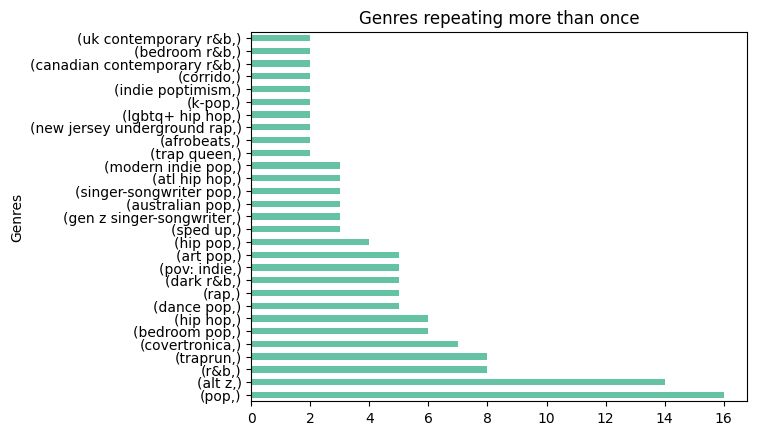

In [ ]:
genreDataFrame.groupby('Genres').filter(lambda x: len(x) > 1 ).value_counts().plot(kind= "barh", title="Genres repeating more than once", colormap= "Set2") #omg?? this actually worked wtf??????! okay for future self, we're filtering those genres that appear more than once, so minimum 2 times, wowowowow

Pop, alt z, r&b and traprun seem to be the top 3 most popular genres.

##Looking at the "one hit wonders" of the list
(pun intended lol?)

In [ ]:
from collections import Counter

ones = genreDataFrame.groupby('Genres').filter(lambda x: len(x) == 1 ) #Looking at those genres that only appeared once in the list
#ones.head

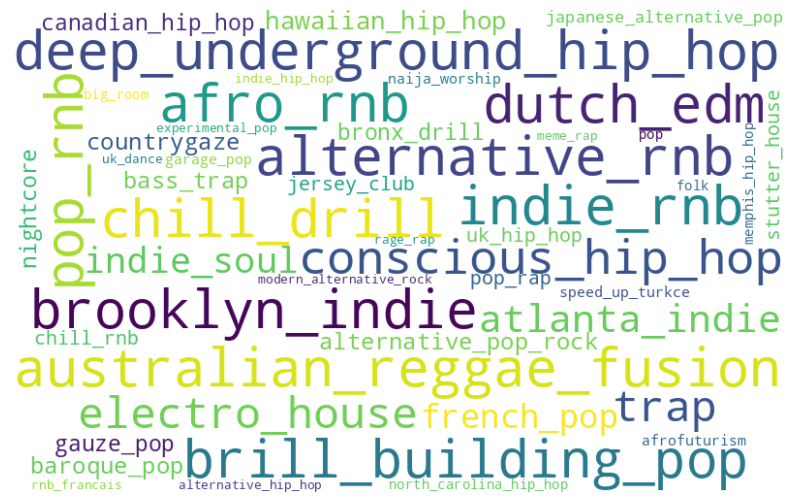

In [ ]:
# Create a word cloud image

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of genre names
genre_names = [
    "deep underground hip hop", "brooklyn indie", "australian reggae fusion",
    "alternative rnb", "indie rnb", "brill building pop", "chill drill",
    "dutch edm", "afro rnb", "pop rnb", "conscious hip hop", "electro house",
    "trap", "atlanta indie", "indie soul", "french pop", "hawaiian hip hop",
    "alternative pop rock", "countrygaze", "baroque pop", "bass trap",
    "canadian hip hop", "gauze pop", "nightcore", "bronx drill", "jersey club",
    "chill rnb", "pop rap", "uk hip hop", "stutter house", "japanese alternative pop",
    "speed up turkce", "naija worship", "afrofuturism", "garage pop",
    "north carolina hip hop", "folk-pop", "memphis hip hop", "big room",
    "alternative hip hop", "rage rap", "modern alternative rock", "experimental pop",
    "meme rap", "indie hip hop", "uk dance", "rnb francais"
]

# Replace spaces with underscores in each genre name so that they don't break into multiple sections
genre_names_with_underscores = [genre.replace(" ", "_") for genre in genre_names]

# Combine the genre names into a single string with spaces in between
text = ' '.join(genre_names_with_underscores)

# Create a word cloud object
wordcloud = WordCloud(width = 800, height = 500, background_color ='white', collocations=False).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 47 such genres that appear only once. These are the least popular genres.

# Artist Analysis

At this point, I was interested to see who the trend setters were and which artists were responsible for setting the most popular moods being set on TikTok.

In [ ]:
tiktokJan[tiktokJan.duplicated('Artist', keep=False)].sort_values('Artist')
rep = tiktokJan[['Artist', 'Song', 'Popularity']].copy() #copying the required columns to analyze
rep.Artist.str.split(pat=",", expand=True) #separating artists from our dataframe to a new dataframe

0                 1       2     3
0       Tate McRae              None    None  None
1      Jack Harlow              None    None  None
2      Kenya Grace              None    None  None
3             Tyla              None    None  None
4        Jung Kook             Latto    None  None
..             ...               ...     ...   ...
216  Beach Weather              None    None  None
217        Ruth B.  sped up + slowed  slater  None
218      LonelyEve              None    None  None
219     Hotel Ugly              None    None  None
220         Miguel              None    None  None

[221 rows x 4 columns]

## Checking Artists, Collaborations Included

Here, I created a pie chart of the artists who have more than one song charting on TikTok (which is interactive-- you can hover over the figure to see the artists).

In [ ]:
repeatingArtist = rep[rep.duplicated(['Artist'], keep=False)].sort_values('Artist') #looking at those artist that repeat

In [ ]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lime', 'green']

fig = go.Figure(data=[go.Pie(labels= repeatingArtist['Artist'],values= repeatingArtist['Song'].value_counts())])
fig.update_traces(title_text = "Artists with the most hits in the TikTok Global 200", hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)
                  ))
fig.show()

## Looking at the artists individually, beyond collaborations.

In [ ]:
rep
# Replace "Tyler, the Creator" with "Tyler the Creator" to avoid splitting
rep['Artist'] = rep['Artist'].str.replace("Tyler, The Creator", "Tyler The Creator")
rep

Artist                                    Song  \
0                         Tate McRae                                  greedy   
1                        Jack Harlow                             Lovin On Me   
2                        Kenya Grace                               Strangers   
3                               Tyla                                   Water   
4                    Jung Kook,Latto     Seven (feat. Latto) (Explicit Ver.)   
..                               ...                                     ...   
216                    Beach Weather                        Sex, Drugs, Etc.   
217  Ruth B.,sped up + slowed,slater            Dandelions - slowed + reverb   
218                        LonelyEve  The Hills X Creepin X The Color Violet   
219                       Hotel Ugly                 Shut up My Moms Calling   
220                           Miguel                    Sure Thing - Sped Up   

     Popularity  
0            99  
1            98  
2            96  
3            95  
4            91  
..          ...  
216          81  
217          73  
218          73  
219          90  
220          77  

[221 rows x 3 columns]

In [ ]:
# Split and explode
rep_exploded = rep.assign(Artist=rep['Artist'].str.split(',')).explode('Artist')

# Count the number of songs for each artist
artist_counts = rep_exploded['Artist'].value_counts()
artist_more_than_2 = artist_counts[artist_counts > 1]
artist_less_than_2 = artist_counts[artist_counts < 2]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.



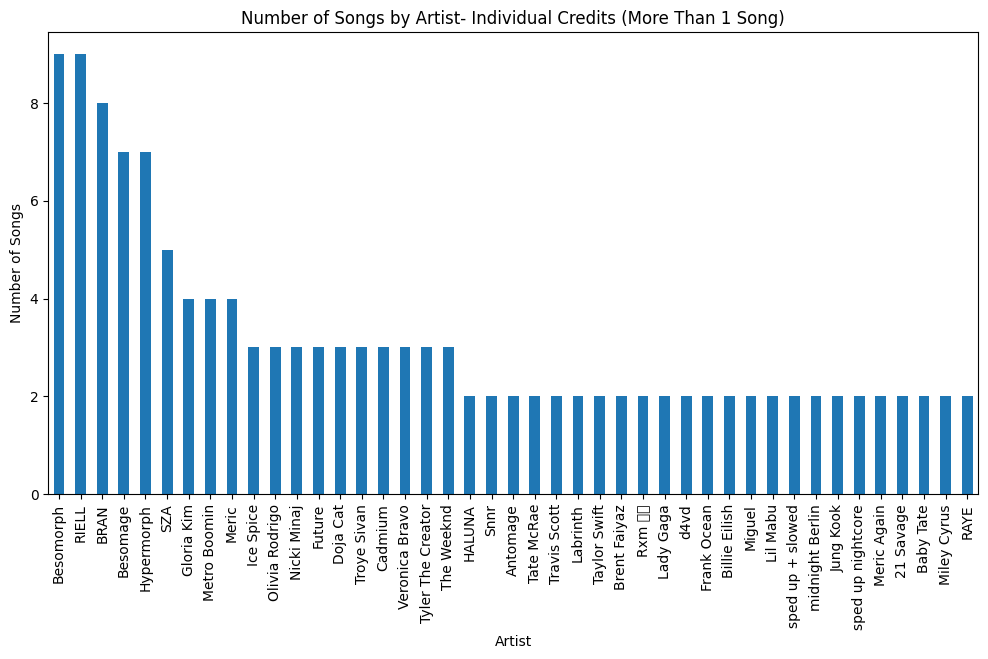

In [ ]:
# Bar plot for artists with more than 2 songs
plt.figure(figsize=(12, 6))
artist_more_than_2.plot(kind='bar')
plt.title('Number of Songs by Artist- Individual Credits (More Than 1 Song)')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.show()


It's extremely clear that Besomorph, RIELL, BRAN, Besomage and Hypermorph are the most popular artists. These artists have charted multiple times throughout the chart with 5 or more songs, even with individual credits. These songs were either stand-alone singles or collaborations between artists (or a combination of the same 4 artists!). Artists with more than 1 songs charting are interesting to onserve because of how their genres affect the overall vibe of what people are listening to, creating an interesting moodboard.

##Quick Skew Test

In [ ]:
# skewness along the index axis
tiktokJan.skew(axis = 0, skipna = True)

<ipython-input-67-545330f7243b>:2: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



#                 0.000000
Popularity       -0.930104
BPM              -0.204271
Dance            -0.142388
Energy           -0.424887
Acoustic          0.872575
Instrumental      4.003163
Happy             0.262182
Speech            2.468407
Live              1.503457
Loud             -1.520471
Time Signature   -3.876374
dtype: float64

Because our features of interest are all within -2 and +2 skewness, I thought taking a mean instead of a median would be representative of the distribution, albeit it's not entirely normal. Thus, I will be taking the mean/average of the features moving forward with the calculations.

#Relationships between various features: What makes these songs popular on TikTok?


In this section, I wanted to look into how the features of interested interacted with each other and how likely one is correlated to the other.

##Correlation Heatmap

<ipython-input-68-4987226a90fb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



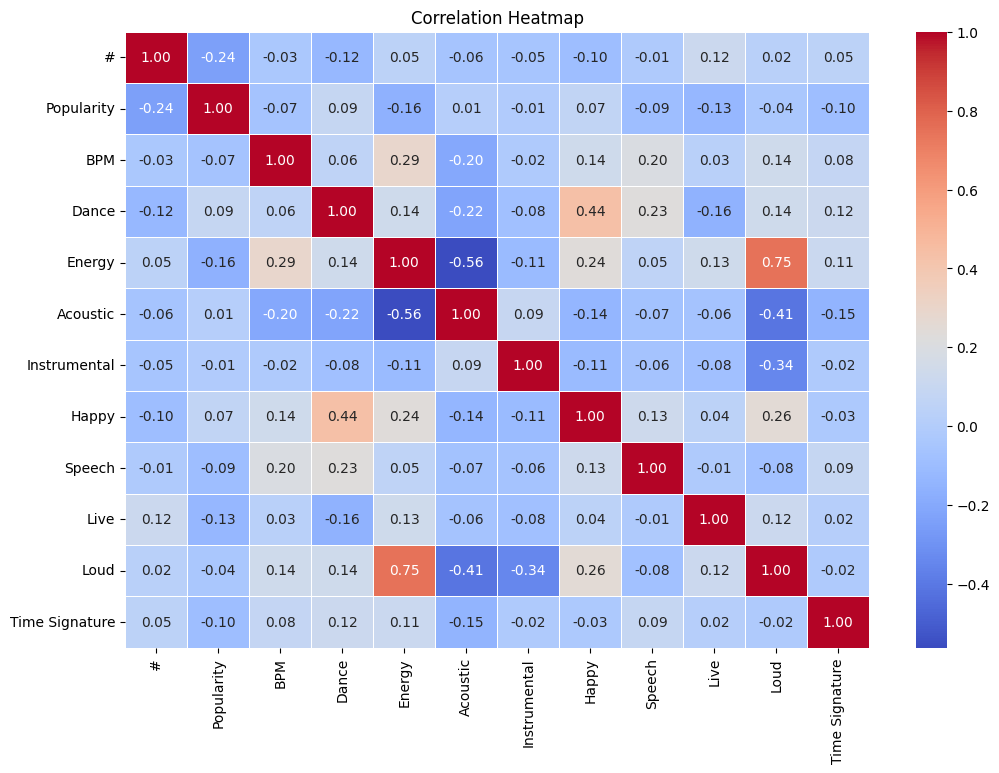

In [ ]:
correlation_matrix = tiktokJan.corr(method='pearson')
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows up what we have probably thought of intuitively. The Loudness and Energy levels of a song are highly correlated.  Similarly, Happy songs are also likely to be Danceable. There's some correlation between Energy and BPM, but not as much as I thought it would be, which was an interesting find.

On the flipside, the negative correlations also made sense. Acoustic-heavy songs are less likely to be Loud and Energetic. This was proven to be true by the heatmap.

##Loudness and Energy Levels

Here, I wanted to explore the trends between Loudness and Energy levels.

Pearson Correlation between Energy and Loudness: 0.7461695972847416


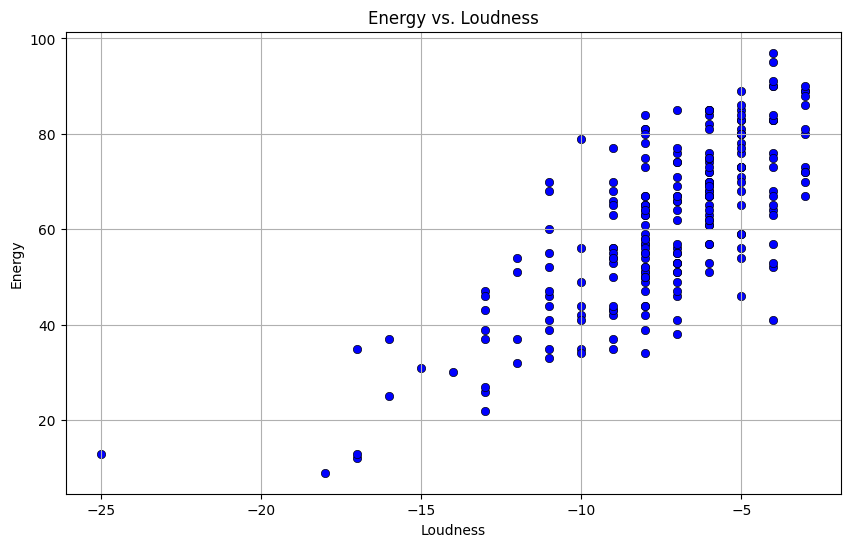

In [ ]:
correlation_energy_loudness = tiktokJan[['Energy', 'Loud']].corr().iloc[0, 1]
print(f'Pearson Correlation between Energy and Loudness: {correlation_energy_loudness}')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktokJan, x='Loud', y='Energy', color='blue', edgecolor='black')
plt.title('Energy vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


In this plot, there's a high concentration of points around the -10 to -5 dB range suggesting many of these songs have a high loudness level. As the loudness increases (values going from -25 to -5), the energy also seems to range more broadly, particularly becoming denser as the loudness approaches -5 dB. There might be a slight trend where energy increases with loudness, especially in the denser areas of the plot.

Let's look at the outlier that is the least loud:

In [ ]:
tiktokJan[['Artist', 'Song', 'Loud','Popularity']].sort_values(by='Loud').head(1)

Artist              Song  Loud  Popularity
72  sign crushes motorist  theres this girl   -25          68

Here's the song: https://www.youtube.com/watch?v=LmRjmrP5dFw

(can confirm, it's pretty soft and slow--very calming indeed)

##Danceability and Happy Levels

Here, I am looking at the Dance and Happy features.

Pearson Correlation between Happy and Dance: 0.7461695972847416


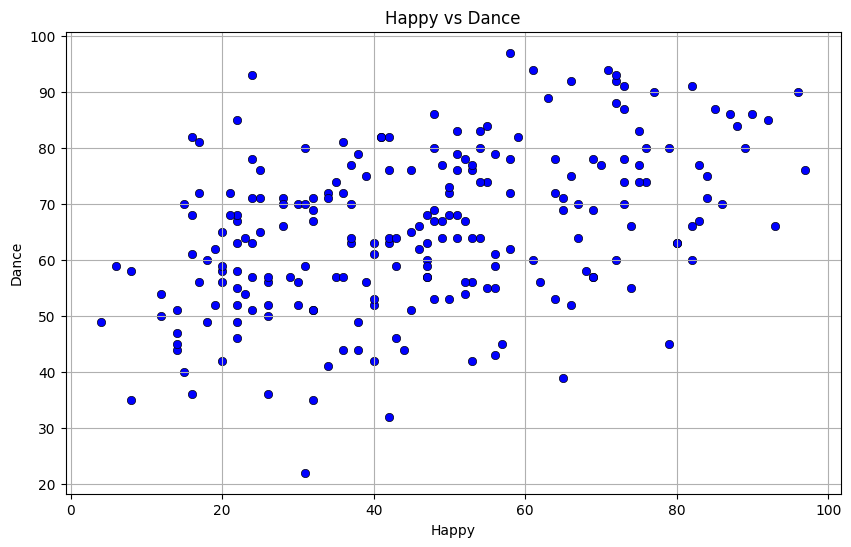

In [ ]:
correlation_dance_happy = tiktokJan[['Happy', 'Dance']].corr().iloc[0, 1]
print(f'Pearson Correlation between Happy and Dance: {correlation_energy_loudness}')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktokJan, x='Happy', y='Dance', color='blue', edgecolor='black')
plt.title('Happy vs Dance')
plt.xlabel('Happy')
plt.ylabel('Dance')
plt.grid(True)
plt.show()

The plot has several dense regions, with one notable around the 60-80 range for both "Happy" and "Dance". The points are fairly evenly distributed across the range of happiness scores, but there is a slight concentration of higher danceability scores overall. This could mean that the set of songs being analyzed tend to be more danceable in general. This scatter plot can give us some insight into the mood and danceability of a collection of songs. For example, if a DJ wanted to play music that is both happy and good for dancing, they might choose songs from the cluster with higher values on both axes.


##BPM and Popularity

I wanted to look at the Beats Per Minute and Popularity of the songs. I was curious to see if songs that were more upbeat were generally more popular.

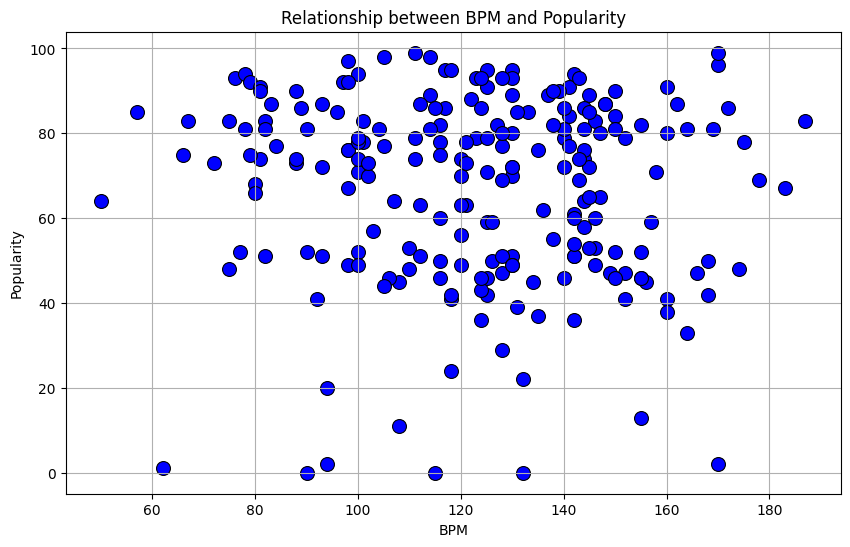

Correlation coefficient between BPM and Popularity: -0.06552132704300107


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#BPM and Popularity
# Calculate the correlation
correlation = tiktokJan[['BPM', 'Popularity']].corr().iloc[0, 1]

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktokJan, x='BPM', y='Popularity', s=100, color='blue', edgecolor='black')
plt.title('Relationship between BPM and Popularity')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

print(f'Correlation coefficient between BPM and Popularity: {correlation}')

# Step 3: Analyze Genre and Popularity
tiktokJan['Primary Genre'] = tiktokJan['Genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# Group by 'Primary Genre' and calculate average popularity
genre_popularity = tiktokJan.groupby('Primary Genre')['Popularity'].mean().sort_values(ascending=False)



The plot has a relatively dense cluster of points in the BPM range of around 100 to 140, which is common for many pop and dance songs. This suggests that songs within this tempo range have varying levels of popularity.There's a wide distribution of popularity scores across different BPMs, which indicates that tempo alone does not predict a song's popularity. There are songs with high popularity across all BPMs, but especially a few outliers with very high popularity at mid-range BPMs. Similarly, there are songs with low popularity at various BPMs.

This scatter plot suggests that while there is some concentration of popular songs within a certain BPM range, there is no strong correlation between a song's tempo and its popularity. This can be useful for music producers and artists to understand that while BPM is an important aspect of a song's composition, it alone does not determine its popularity.

##Visualizing popular genres (average)

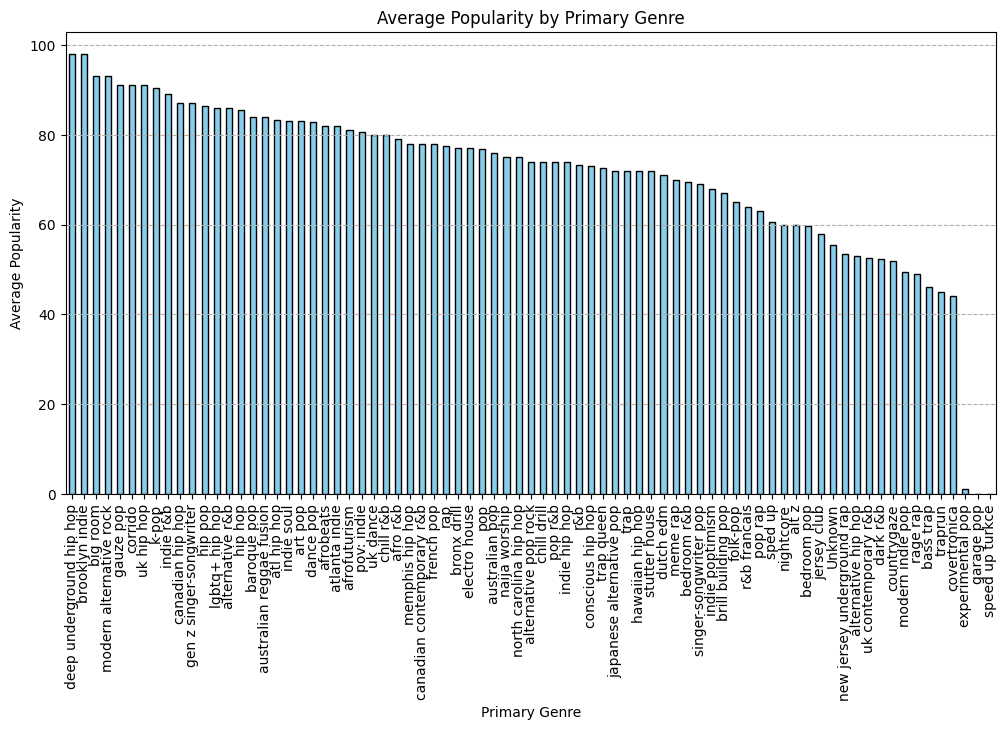

In [ ]:
# Visualize the average popularity by genre
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

These are the the most popular primary genres from our data!

## BPM and Its Effect on Danceability and Energy

Here, I wanted to explore the effect of BPM on Dance and Energy separately, and compare them.

Correlation between BPM and Danceability: 0.05934561435715538
Correlation between BPM and Energy: 0.2919780049168533


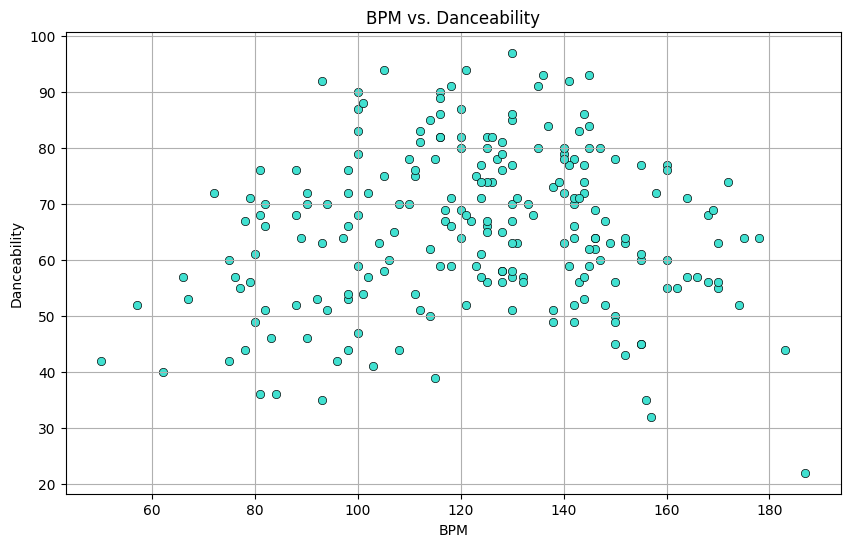

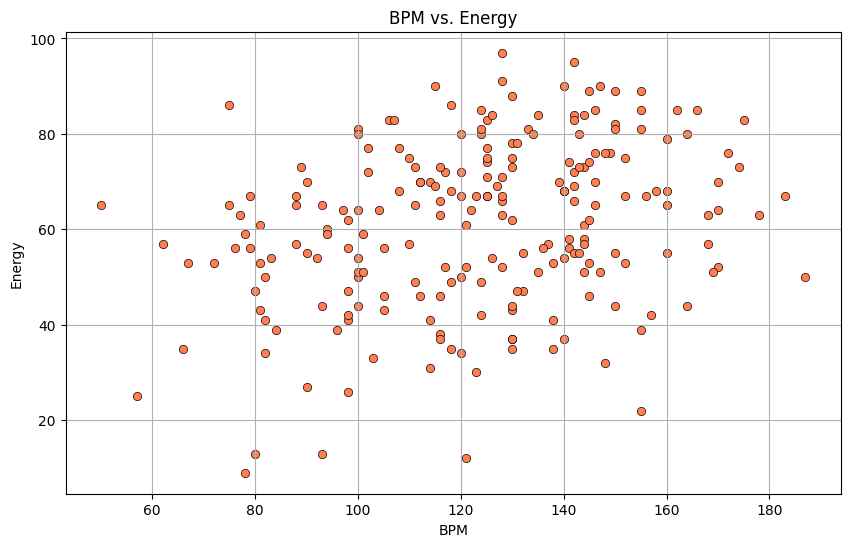

In [ ]:
# Calculate correlation coefficients
correlation_bpm_dance = tiktokJan[['BPM', 'Dance']].corr().iloc[0, 1]
correlation_bpm_energy = tiktokJan[['BPM', 'Energy']].corr().iloc[0, 1]

print(f'Correlation between BPM and Danceability: {correlation_bpm_dance}')
print(f'Correlation between BPM and Energy: {correlation_bpm_energy}')

# Scatter plot for BPM and Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktokJan, x='BPM', y='Dance', color='turquoise', edgecolor='black')
plt.title('BPM vs. Danceability')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

# Scatter plot for BPM and Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktokJan, x='BPM', y='Energy', color='coral', edgecolor='black')
plt.title('BPM vs. Energy')
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


The BPM vs. Danceability plot hints at a somewhat positive correlation where songs with a mid-level BPM tend to have higher danceability.The BPM vs. Energy plot does not show a clear correlation between BPM and energy levels, suggesting that a song's tempo is not a reliable indicator of its energy. Both plots have outliers, but they're more noticeable in the BPM vs. Danceability plot where there are a few songs with high danceability at lower BPMs. The BPM vs. Danceability plot appears to have more of a cluster formation, especially around the middle BPM values, compared to the BPM vs. Energy plot which is more scattered.

##Impact of Release Dates

Next, I wanted to see how release dates affected the performances of these songs. How many songs charted when? What seasons have the most energetic or popular songs trending?

In [ ]:
# Convert release dates to datetime format
tiktokJan['Album Date'] = pd.to_datetime(tiktokJan['Album Date'],errors='coerce')

# Extract useful date parts
tiktokJan['Month'] = tiktokJan['Album Date'].dt.month
tiktokJan['DayOfWeek'] = tiktokJan['Album Date'].dt.dayofweek  # Monday=0, Sunday=6
tiktokJan['Season'] = tiktokJan['Album Date'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Example: Analyzing by Month
avg_by_month = tiktokJan.groupby('Month')[['Popularity', 'Dance', 'Energy','BPM', 'Happy']].mean()

# Example: Analyzing by Season
avg_by_season = tiktokJan.groupby('Season')[['Popularity', 'Dance', 'Energy','BPM', 'Happy']].mean()


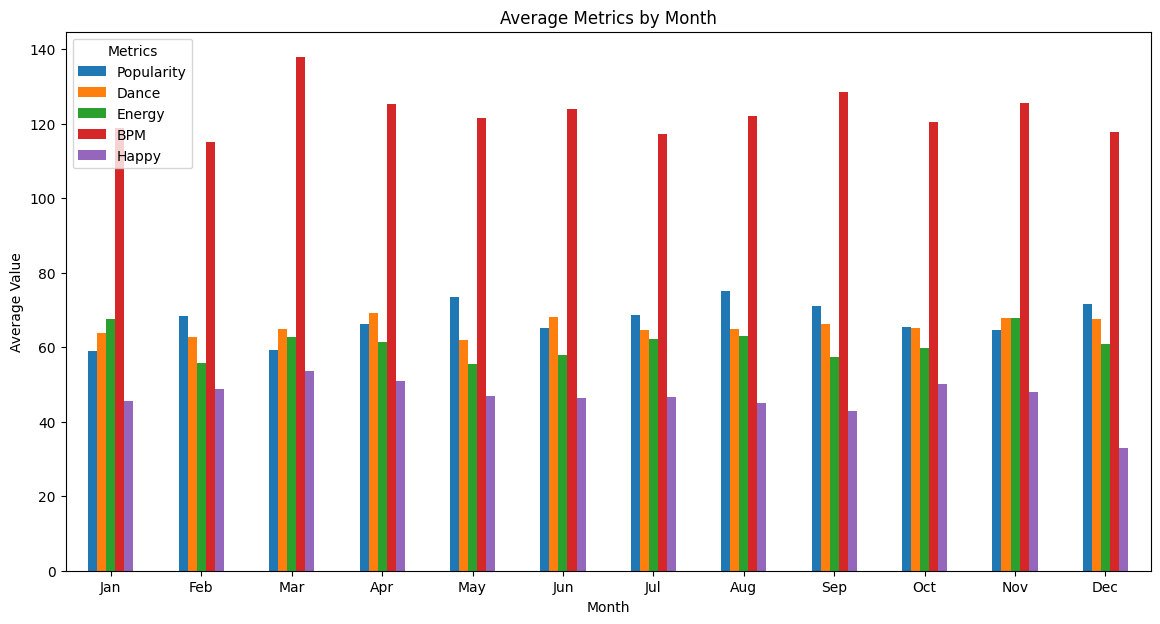

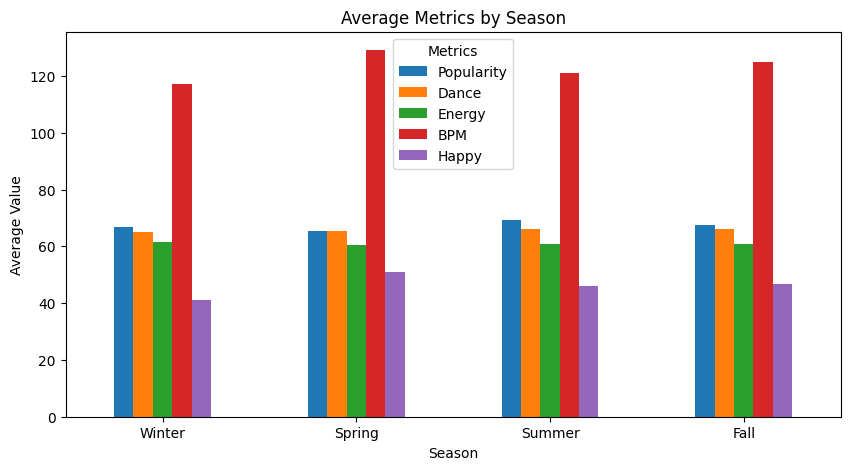

In [96]:
import matplotlib.pyplot as plt

# Plotting average metrics by month
avg_by_month.plot(kind='bar', figsize=(14, 7))
plt.title('Average Metrics by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Metrics')
plt.show()

# Plotting average metrics by season
avg_by_season.plot(kind='bar', figsize=(10, 5))
plt.title('Average Metrics by Season')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.xticks(ticks=range(4), labels=['Winter', 'Spring', 'Summer', 'Fall'], rotation=0)
plt.legend(title='Metrics')
plt.show()

##Key and Camelot Relationship

Distribution of Songs by Key and Camelot Code: This can help understand which keys and Camelot codes are most common in the dataset.


Relationship between Camelot Code and Song Metrics: Analyze if certain Camelot codes are associated with higher popularity, danceability, energy, etc.


Transition Analysis: Explore potential transitions between songs based on their Camelot codes to suggest harmonically compatible mixes.

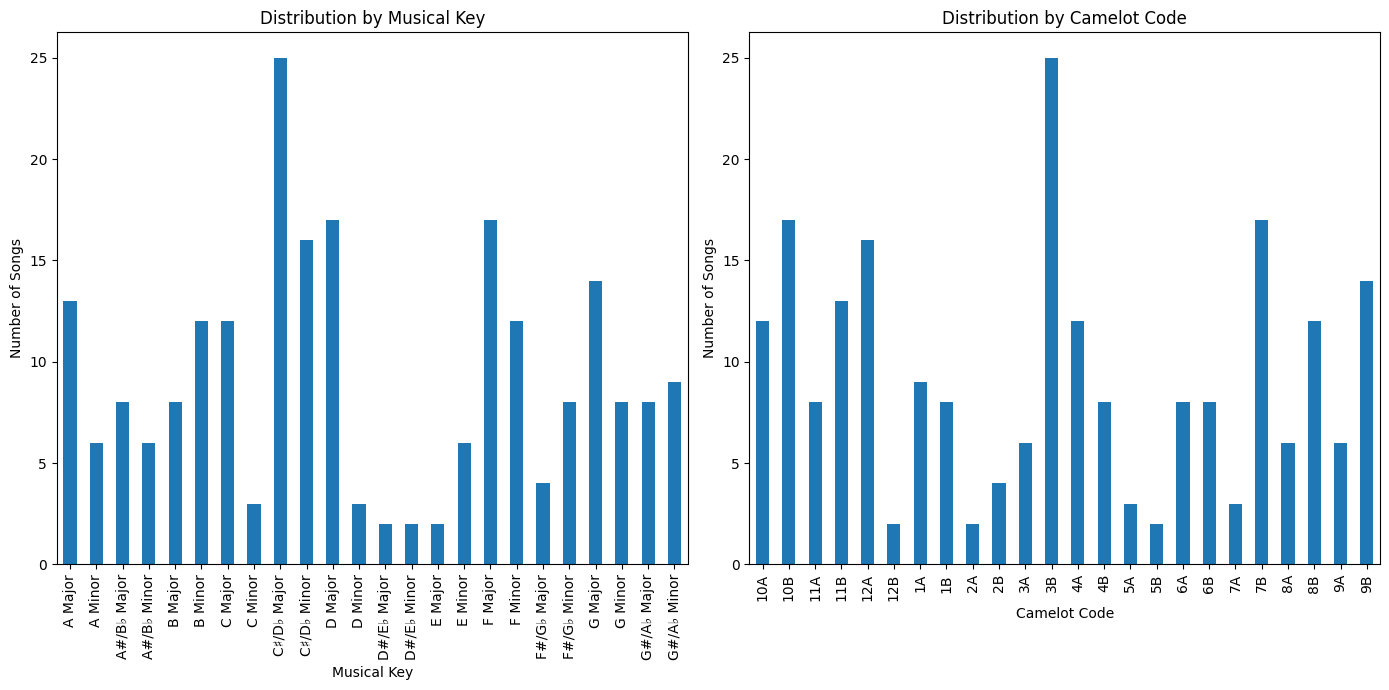

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribution by Key
key_distribution = tiktokJan['Key'].value_counts().sort_index()

# Distribution by Camelot Code
camelot_distribution = tiktokJan['Camelot'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
key_distribution.plot(kind='bar', title='Distribution by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')

plt.subplot(1, 2, 2)
camelot_distribution.plot(kind='bar', title='Distribution by Camelot Code')
plt.xlabel('Camelot Code')
plt.ylabel('Number of Songs')

plt.tight_layout()
plt.show()


I wanted to look at how keys could be mapped to an emotion. In music, certain keys arouse certain moods. This link shows this discourse about the most popular key from our data, the C# key, https://glasses.withinmyworld.org/index.php/2011/09/10/c-sharp-aka-d-flat-a-key-of-many-moods/

Taking a direct quote from the blog, this key feels like "home". It's also "sparkling crystals on deep violet backgrounds" and in terms of touch, feels like "velvet".


Looking at the Camelot itself, a wheel is a better representation of the feature. When DJs mix keys between songs, they try to mix to relatively similar/easy to mix keys in terms of transitions.

3B seems to be the most popular code. The codes that would ensure a smoother transitions between ohter similar songs can be calculated below:

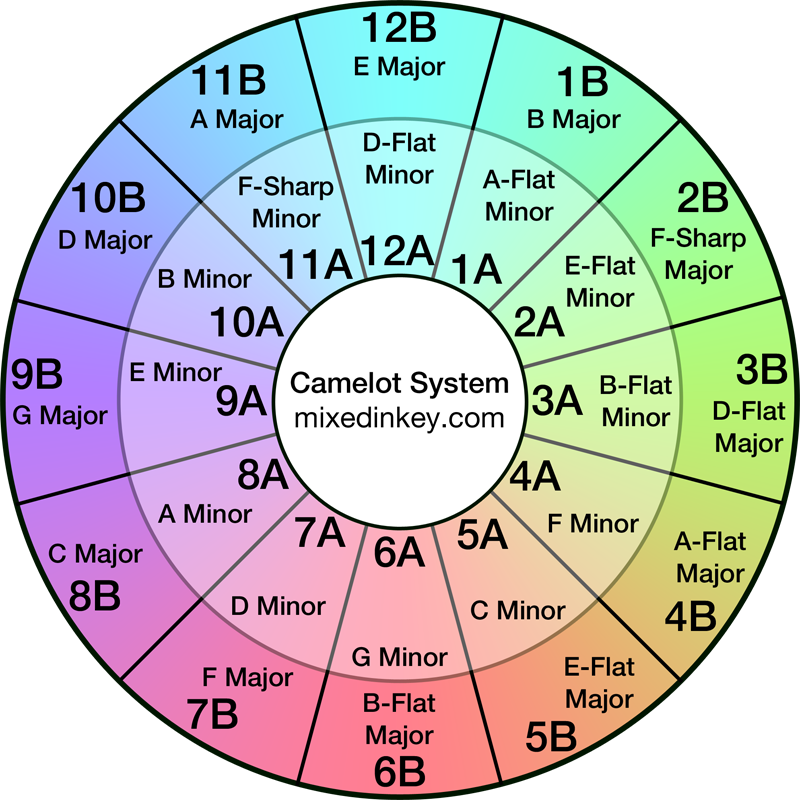

##Calculating Compatible Camelot Codes for 3B

In [ ]:
def find_compatible_camelot_codes(code):
    number, letter = int(code[:-1]), code[-1]
    compatible_codes = [f"{(number - 2) % 12 + 1}{letter}", f"{number}{letter}", f"{(number % 12) + 1}{letter}"]
    if letter == 'A':
        compatible_codes.append(f"{number}B")
    else:
        compatible_codes.append(f"{number}A")
    return compatible_codes

# Example: Find compatible codes for 5A
compatible_codes = find_compatible_camelot_codes('3B')
print("Compatible Camelot Codes for 3B:", compatible_codes)


Compatible Camelot Codes for 3B: ['2B', '3B', '4B', '3A']


'2B', '3B', '4B', '3A' seem to be the most compatible, hence making them more similar than the rest of the keys. Looking at the distribution of the keys in the chart, there aren't a lot of keys to mix with, which I found interesting.

##Popularity by Key

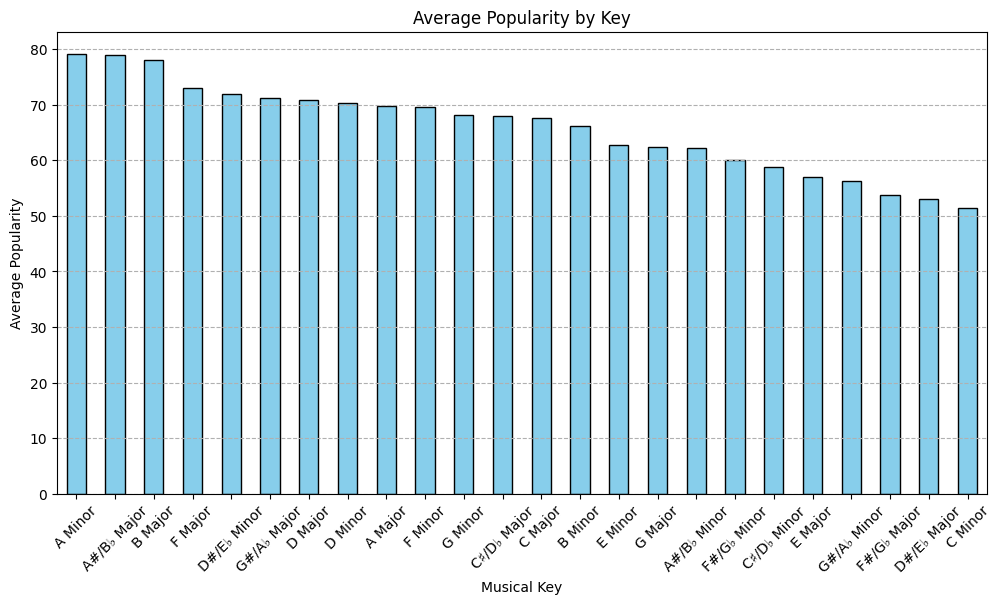

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Key' and calculate average popularity
avg_popularity_by_key = tiktokJan.groupby('Key')['Popularity'].mean().sort_values(ascending=False) #taking the mean ensures even the outliers are taken into account, just because the data varies so much and are equally relavant

# Plotting
plt.figure(figsize=(12, 6))
avg_popularity_by_key.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity by Key')
plt.xlabel('Musical Key')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


It was interesting to observe how the number of songs in a certain key didn't determine the popularity of the songs charting. Looking at songs based on popularity, with respect to their keys, A Minor seems to be the most "popular" key, despite C# major winning the overall quantity game.

##Metrics based on Camelot

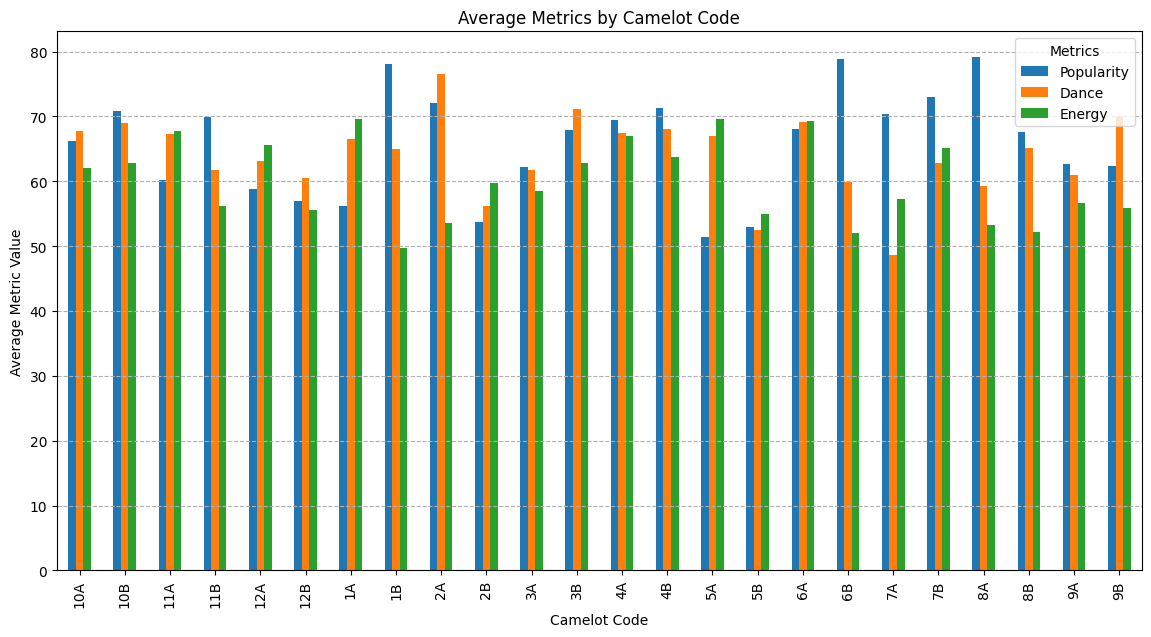

In [ ]:
# Grouping by Camelot Code and calculating average metrics
avg_metrics_by_camelot = tiktokJan.groupby('Camelot')[['Popularity', 'Dance', 'Energy']].mean()

# Plotting
avg_metrics_by_camelot.plot(kind='bar', figsize=(14, 7), title='Average Metrics by Camelot Code')
plt.xlabel('Camelot Code')
plt.ylabel('Average Metric Value')
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--')

plt.show()


1B, 6B and 8A had the most popular songs charting. Looking at the relationship between the Popularity, Dance and Energy of the song. 1B seems to be the least energetic song and yet ranks high in terms of popularity. 6B and 8A also seem to follow similar trends!

6A and 4A seem to be pretty consistent with all three metrics.

# Analysis of Spotify USA 50 Charts

After looking at the TikTok charts, I wanted to focus on teh USA top 50 charts on Spotify. This was also taken from Jan 4 2024. I perform similar analysis on the data. I wanted to see if the songs charting on TikTok were actually climbing the USA charts. Were the 30 second clips enough to launch the popularity of some of these artists? Were they compelling enough that the artists performed consistently? These were some questions I was interested to explore and compare with the TikTok data.

In [ ]:
USATop50 = pd.read_csv('/content/drive/MyDrive/Statistical Analysis of Music/Top 50 - USA.csv')
USATop50.head(3)

#                                           Song  \
0  1                                    Lovin On Me   
1  2                                   Stick Season   
2  3  I Remember Everything (feat. Kacey Musgraves)   

                       Artist  Popularity  BPM  \
0                 Jack Harlow          98  105   
1                  Noah Kahan          95  118   
2  Zach Bryan,Kacey Musgraves          93   78   

                                              Genres  \
0  deep underground hip hop, kentucky hip hop, po...   
1                                         pov: indie   
2  classic oklahoma country, modern country pop, ...   

                                       Parent Genres         Album  \
0  deep underground hip hop, kentucky hip hop, po...   Lovin On Me   
1                                         pov: indie  Stick Season   
2  classic oklahoma country, modern country pop, ...    Zach Bryan   

   Album Date   Time  Dance  Energy  Acoustic  Instrumental  Happy  Speech  \
0  2023-11-10  02:18     94      56         0             0     61       0   
1  2022-10-14  03:02     66      49        78             0     82       0   
2  2023-08-25  03:47     43      45        55             0     16       0   

   Live  Loud      Key  Time Signature    Added At        Spotify Track Id  \
0     0    -5  D Major               4  2024-01-09  4xhsWYTOGcal8zt0J161CU   
1    10    -7  A Major               4  2024-01-09  0mflMxspEfB0VbI1kyLiAv   
2    10    -8  C Major               4  2024-01-09  4KULAymBBJcPRpk1yO4dOG   

                        Album Label Camelot  \
0           Generation Now/Atlantic     10B   
1  Mercury Records/Republic Records     11B   
2                    Warner Records      8B   

                                   Spotify Track Img  \
0  https://p.scdn.co/mp3-preview/eeeb6151d0049367...   
1                                                NaN   
2  https://p.scdn.co/mp3-preview/22b240f7ef2eff38...   

                                        Song Preview  
0  https://i.scdn.co/image/ab67616d00004851fcf4ad...  
1  https://i.scdn.co/image/ab67616d000048516ee350...  
2  https://i.scdn.co/image/ab67616d00004851e5a25e...

Let's look at the Popularity of the songs. Spotify determines this 'Popularity' index by calculating the following metrics:

1. Total number of streams of a song
2. How recently that song has been played on Spotify
3. The frequency that the track has been played

In [ ]:
USATop50.columns

Index(['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres',
       'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic',
       'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Key',
       'Time Signature', 'Added At', 'Spotify Track Id', 'Album Label',
       'Camelot', 'Spotify Track Img', 'Song Preview'],
      dtype='object')

##Popularity of Songs

Text(0.5, 1.0, 'Popularity of the USA Top 50 songs')

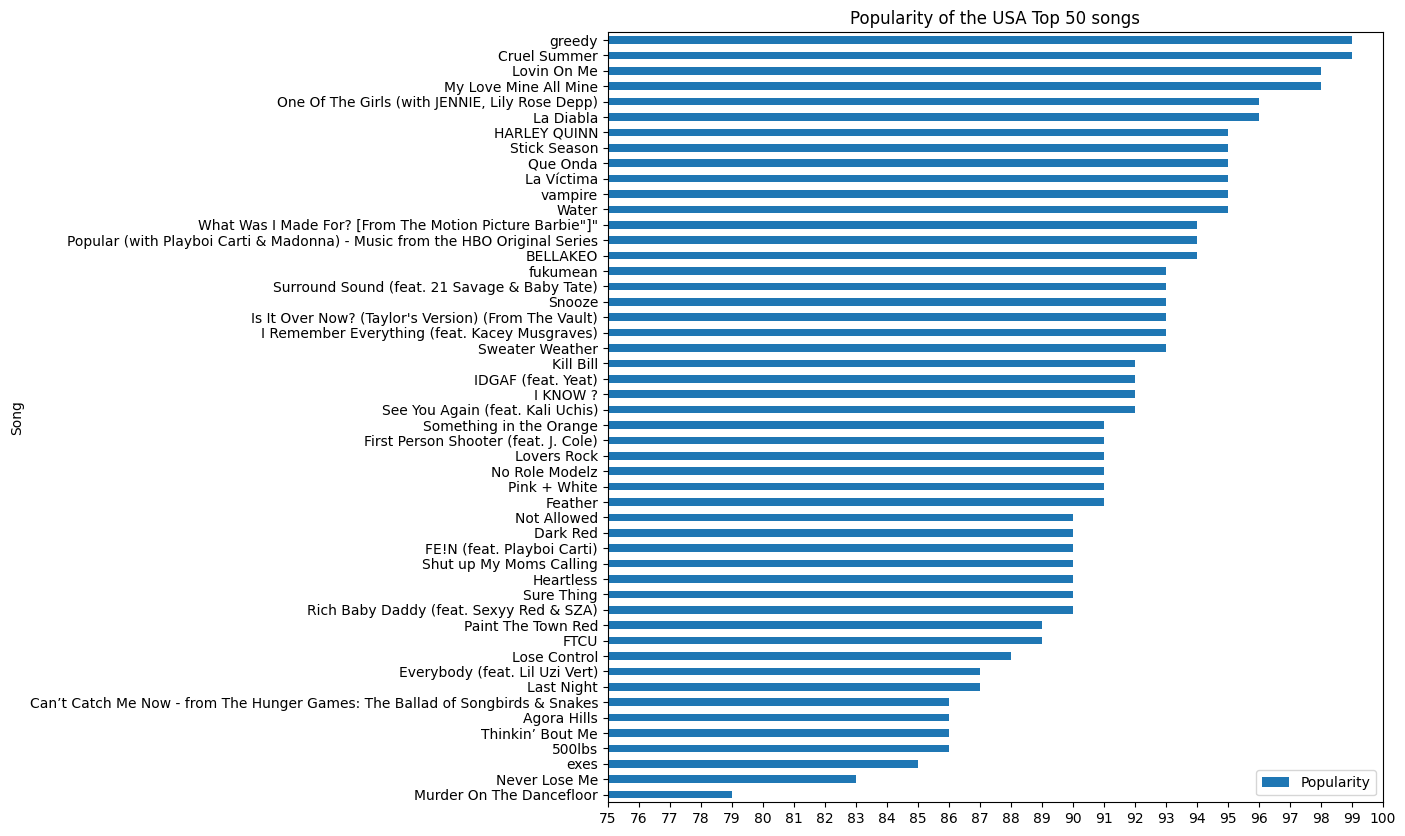

In [ ]:
USATop50.sort_values('Popularity')
USATop50.sort_values(by = "Popularity", ascending=True).plot(x="Song", y="Popularity",
        kind="barh", figsize=(10, 10))

plt.xlim(75, 100)
plt.xticks(range(75, 101))
plt.title("Popularity of the USA Top 50 songs")


Here, I wanted to look at the songs that were trending. It was very clear as to why they're popular because I have heard all of these being played in the internet--youtube shorts, tiktok, the radio etc. I could not say the same for the songs on the TikTok charts. There are clearly more "big name artists" on this chart.

##Release Dates: Old releases vs New releases

Here, I wanted to look at the song release dates rather than the songs' peak popularity since I was curious to see how many songs from the past charted this year.

Text(0.5, 1.0, 'Release Dates of Songs Charting USA Top 50 on January 10th 2024')

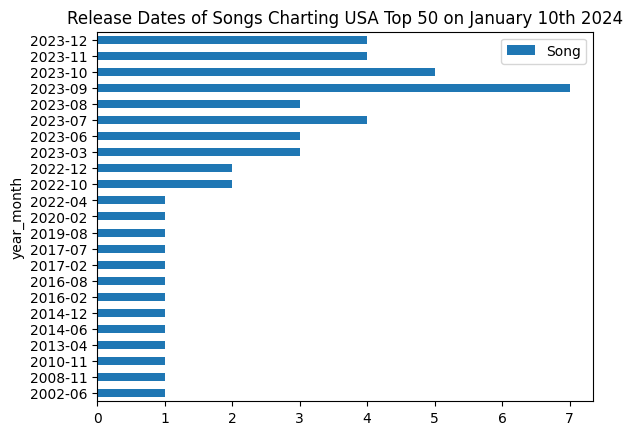

In [ ]:
USATop50["Date"] = pd.to_datetime(USATop50['Album Date']) # convert column to datetime
USATop50['year_month'] = USATop50["Date"].map(lambda dt: dt.strftime('%Y-%m'))

songReleaseDf = USATop50.groupby('year_month').size().to_frame("Song").reset_index()

songReleaseDf.plot(kind='barh', x='year_month', y='Song')
plt.title("Release Dates of Songs Charting USA Top 50 on January 10th 2024")

September 2023 releases seem to be the most popular even 3+ months after their release. October releases outperformed the August releases (5 and 3 songs respectively). The oldest song to chart is from 2002, followed by a 2008 release.

It's interesting to observe how some classic songs have returned. The rise of some songs can be largely attributed to recent movie soundtracks or TikTok trends. Murder on the Dancefloor, a song released in 2002, is one such instance. Due to the success of the movie Saltburn on TikTok, the song was used in a number of hip and viral videos, which helped it return to the charts. In this instance, not even at the time of its original release had the song done so well.


Text(0.5, 1.0, 'Release Dates of Songs Charting USA Top 50 on January 10th 2024')

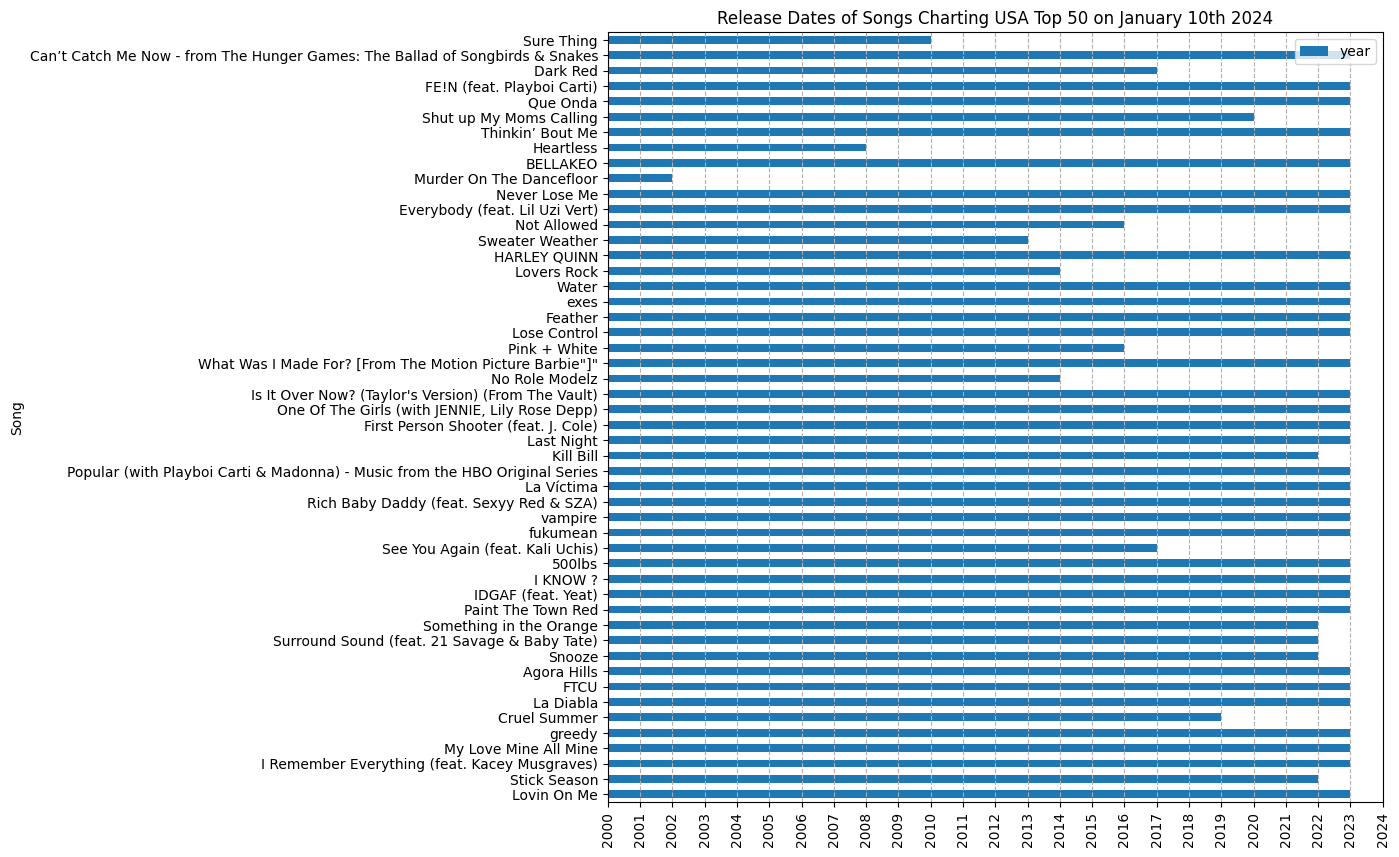

In [ ]:
USATop50['year_month']
USATop50['year'] = USATop50["Date"].map(lambda dt: dt.strftime('%Y'))
USATop50['year'] = pd.to_numeric(USATop50['year'])


USATop50.plot(x="Song", y= "year",
        kind="barh", figsize=(10, 10))

plt.xlim(2000, 2024)
plt.xticks(range(2000, 2025))
plt.grid(axis='x', linestyle='--')

plt.xticks(rotation=90)
plt.title("Release Dates of Songs Charting USA Top 50 on January 10th 2024")


##Correlations of features


<ipython-input-39-efa7e8c3a06e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



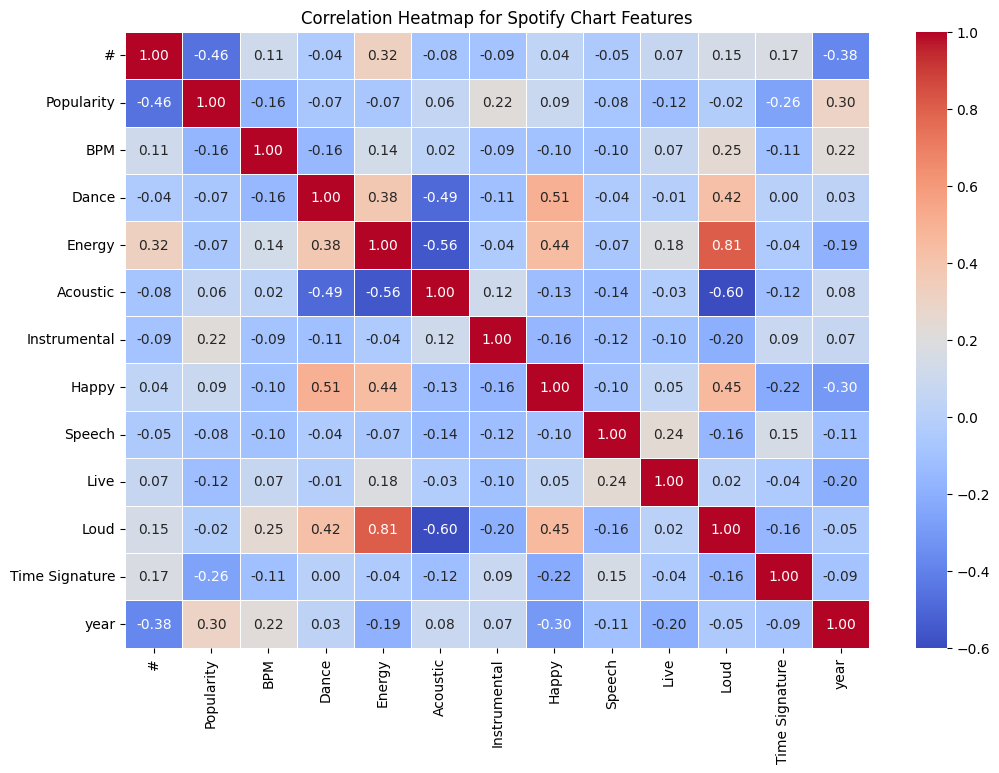

In [ ]:
correlation_matrix = USATop50.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Spotify Chart Features')
plt.show()

## Energy vs Loudness Levels

Similar to the TikTok chart analysis, I compare and analyze various features.

Pearson Correlation between Energy and Loudness: 0.8106336950682614


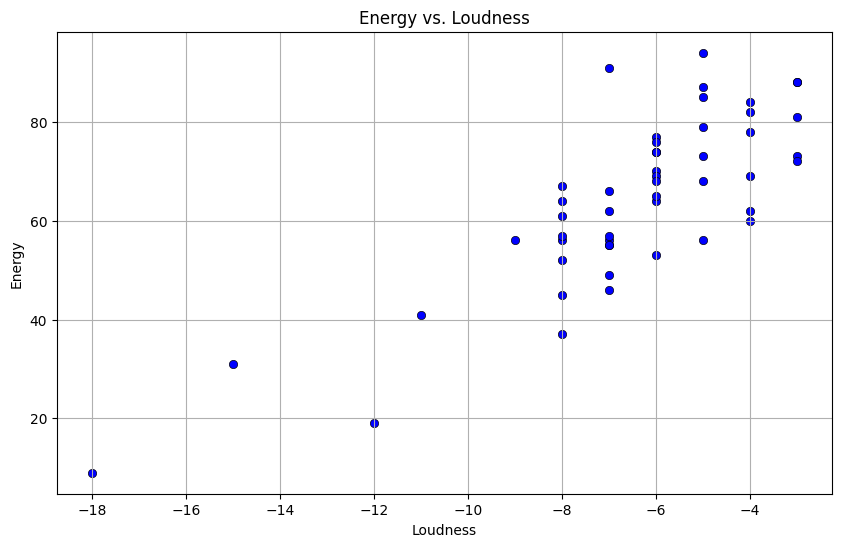

In [ ]:
correlation_energy_loudness = USATop50[['Energy', 'Loud']].corr().iloc[0, 1]
print(f'Pearson Correlation between Energy and Loudness: {correlation_energy_loudness}')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=USATop50, x='Loud', y='Energy', color='blue', edgecolor='black')
plt.title('Energy vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


There is an obvious strong correlation between the Loudness and Energy levels between songs. The upward trend proves this. Thus, we can conclude saying that songs that are high energy and are loud are popular features and make an impact on if the songs chart or not.

Pearson Correlation between Acoustic and Loudness: -0.6002925261564671


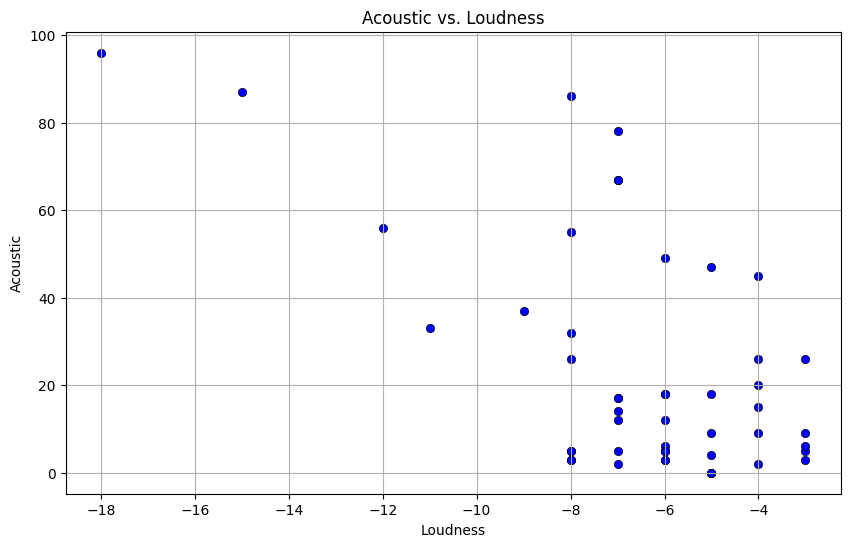

In [ ]:
correlation_energy_loudness = USATop50[['Acoustic', 'Loud']].corr().iloc[0, 1]
print(f'Pearson Correlation between Acoustic and Loudness: {correlation_energy_loudness}')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=USATop50, x='Loud', y='Acoustic', color='blue', edgecolor='black')
plt.title('Acoustic vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Acoustic')
plt.grid(True)
plt.show()


There is a strong negative correlation between acoustic songs the loudness factor. Acoustic songs tend to be less loud. Let's look at the 5 most "acoustic" song that trended.

In [ ]:
USATop50[['Song','Loud','Acoustic']].sort_values(by = 'Acoustic', ascending = False).head(10)

Song  Loud  Acoustic
28  What Was I Made For? [From The Motion Picture ...   -18        96
3                               My Love Mine All Mine   -15        87
48  Can’t Catch Me Now - from The Hunger Games: Th...    -8        86
1                                        Stick Season    -7        78
37                                        Not Allowed    -7        67
29                                       Pink + White    -7        67
11                            Something in the Orange   -12        56
2       I Remember Everything (feat. Kacey Musgraves)    -8        55
43                                   Thinkin’ Bout Me    -6        49
23                                         Last Night    -5        47

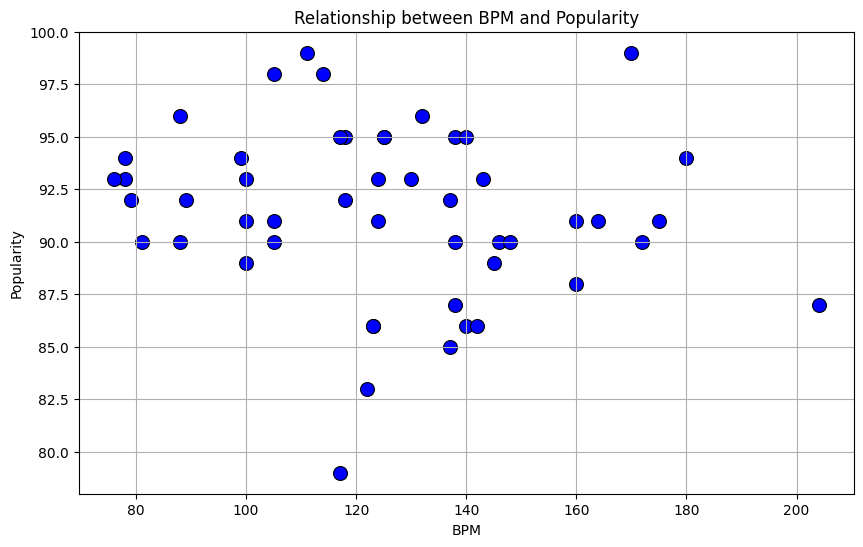

Correlation coefficient between BPM and Popularity: -0.1633116911249454


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#BPM and Popularity
# Calculate the correlation
correlation = USATop50[['BPM', 'Popularity']].corr().iloc[0, 1]

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=USATop50, x='BPM', y='Popularity', s=100, color='blue', edgecolor='black')
plt.title('Relationship between BPM and Popularity')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

print(f'Correlation coefficient between BPM and Popularity: {correlation}')

The plot are too scattered, there may not be meaningful trends between these features.

## Average Popularity by Genre

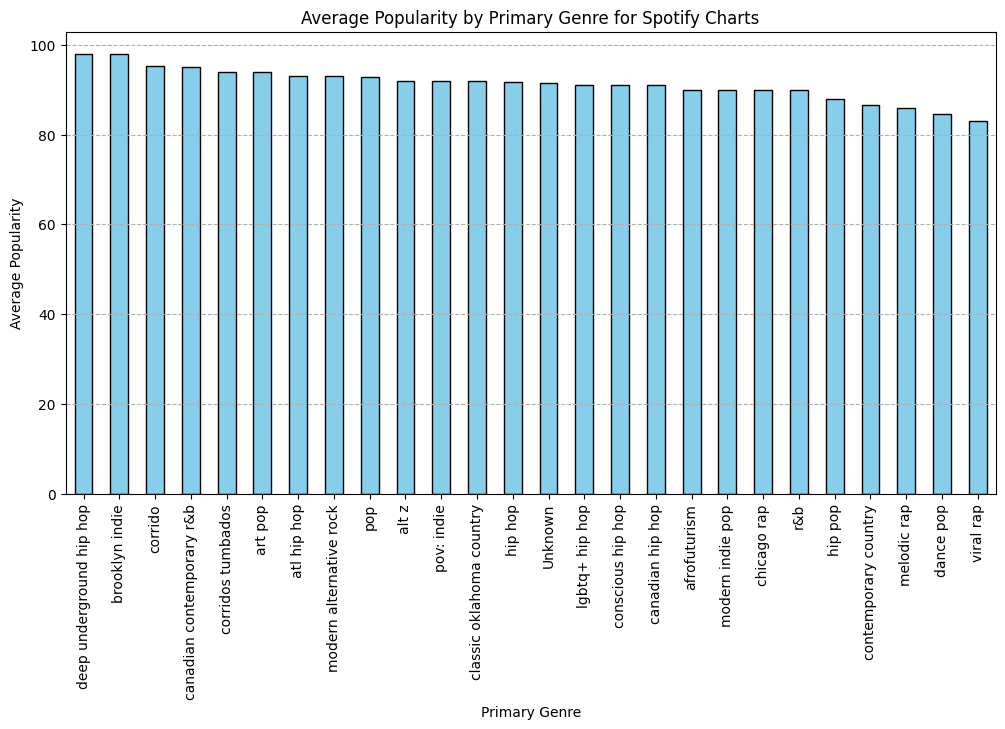

In [ ]:
#Analyze Genre and Popularity
USATop50['Primary Genre'] = USATop50['Genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# Group by 'Primary Genre' and calculate average popularity
genre_popularity = USATop50.groupby('Primary Genre')['Popularity'].mean().sort_values(ascending=False)

# Visualize the average popularity by genre
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity by Primary Genre for Spotify Charts')
plt.xlabel('Primary Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()


Deep underground hip hop, brooklyn indie and corrido seem to be the three most popular based on the average of all the songs in those genres.

##Average Metrics based on Camelot

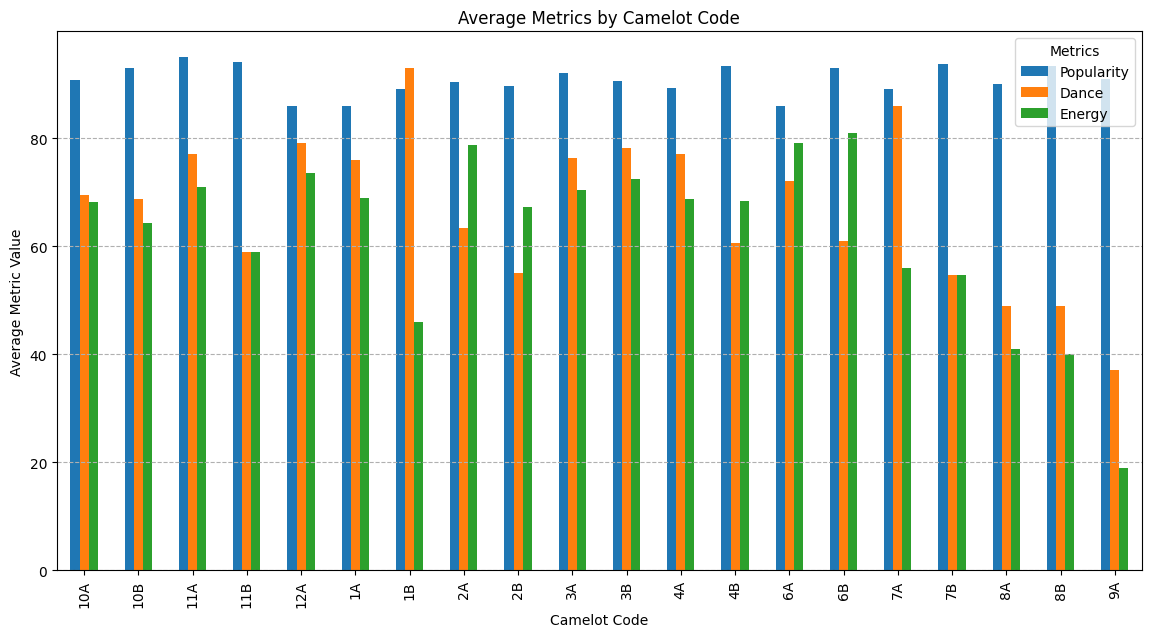

In [ ]:
# Grouping by Camelot Code and calculating average metrics
avg_metrics_by_camelot = USATop50.groupby('Camelot')[['Popularity', 'Dance', 'Energy']].mean()

# Plotting
avg_metrics_by_camelot.plot(kind='bar', figsize=(14, 7), title='Average Metrics by Camelot Code')
plt.xlabel('Camelot Code')
plt.ylabel('Average Metric Value')
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--')

plt.show()


1B and 7A were more danceable codes. All the codes seemed to have similar popularities. The Energy levels were the most drastic in the mentioned codes. Compared to the TikTok charts, this chart seemed to have a more consistent/high dance and popularity scores on average.

##Average Popularity by Key

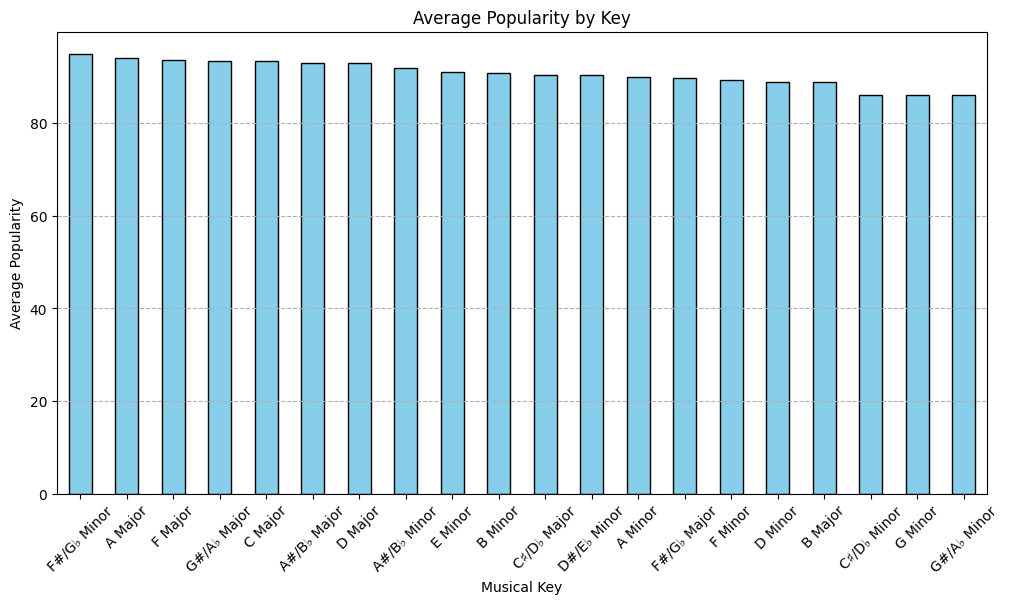

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Key' and calculate average popularity
avg_popularity_by_key = USATop50.groupby('Key')['Popularity'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_popularity_by_key.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity by Key')
plt.xlabel('Musical Key')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


It was interesting to view how all these keys were pretty well represented, compared to the TikTok charts. This shows the average. I wanted to take the median to see if that made more sense and was more representative of the data.

The average and the median weren't that different!

##Distribution by Musical Key and Camelot

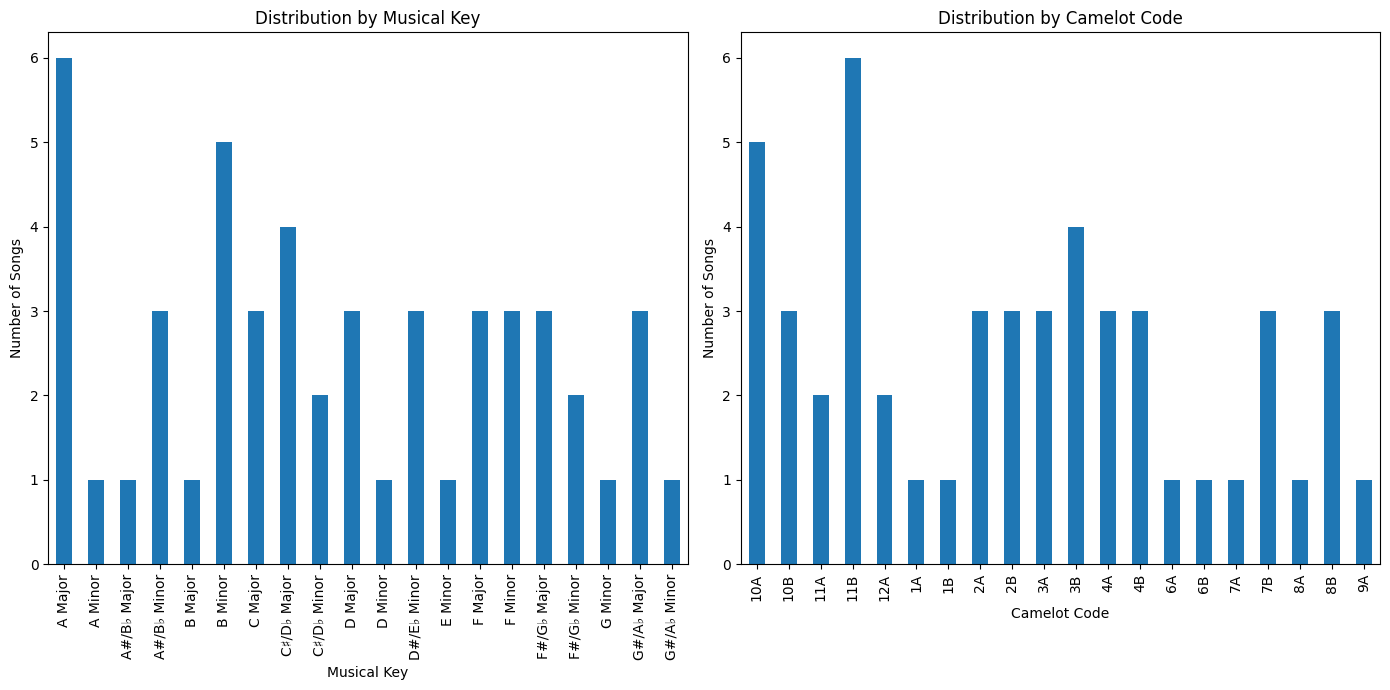

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribution by Key
key_distribution = USATop50['Key'].value_counts().sort_index()

# Distribution by Camelot Code
camelot_distribution = USATop50['Camelot'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
key_distribution.plot(kind='bar', title='Distribution by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')

plt.subplot(1, 2, 2)
camelot_distribution.plot(kind='bar', title='Distribution by Camelot Code')
plt.xlabel('Camelot Code')
plt.ylabel('Number of Songs')

plt.tight_layout()
plt.show()


##Impact of Release Dates

In [98]:
# Convert release dates to datetime format
USATop50['Album Date'] = pd.to_datetime(USATop50['Album Date'],errors='coerce')

# Extract useful date parts
USATop50['Month'] = USATop50['Album Date'].dt.month
USATop50['DayOfWeek'] = USATop50['Album Date'].dt.dayofweek  # Monday=0, Sunday=6
USATop50['Season'] = USATop50['Album Date'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

avg_by_month = USATop50.groupby('Month')[['Popularity', 'Dance', 'Energy']].mean()

avg_by_season = USATop50.groupby('Season')[['Popularity', 'Dance', 'Energy']].mean()

In [146]:
avg_by_month

Popularity      Dance     Energy
Month                                  
2       90.000000  58.666667  70.000000
3       88.000000  64.666667  71.000000
4       92.000000  49.000000  50.000000
6       90.600000  70.400000  73.200000
7       92.600000  63.400000  57.400000
8       94.600000  62.400000  69.600000
9       91.571429  66.571429  60.142857
10      92.714286  63.285714  64.142857
11      90.500000  74.333333  59.666667
12      90.142857  72.857143  64.142857

([<matplotlib.axis.XTick at 0x7847016a8670>,
 [Text(0, 0, 'Feb'),
  Text(1, 0, 'Mar'),
  Text(2, 0, 'May'),
  Text(3, 0, 'Jun'),
  Text(4, 0, 'Jul'),
  Text(5, 0, 'Aug'),
  Text(6, 0, 'Sep'),
  Text(7, 0, 'Oct'),
  Text(8, 0, 'Nov'),
  Text(9, 0, 'Dec')])

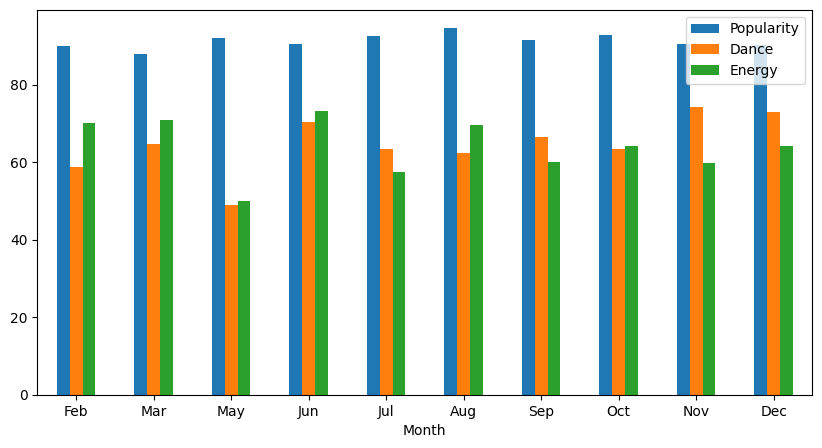

In [150]:
USATop50.groupby('Month')[['Popularity', 'Dance', 'Energy']].mean().plot(kind = 'bar',
                                                                        figsize=(10, 5))
plt.xticks(ticks=range(10), labels=[ 'Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)


Something to note, there were no songs that were released in January and April that charted in January 2024.

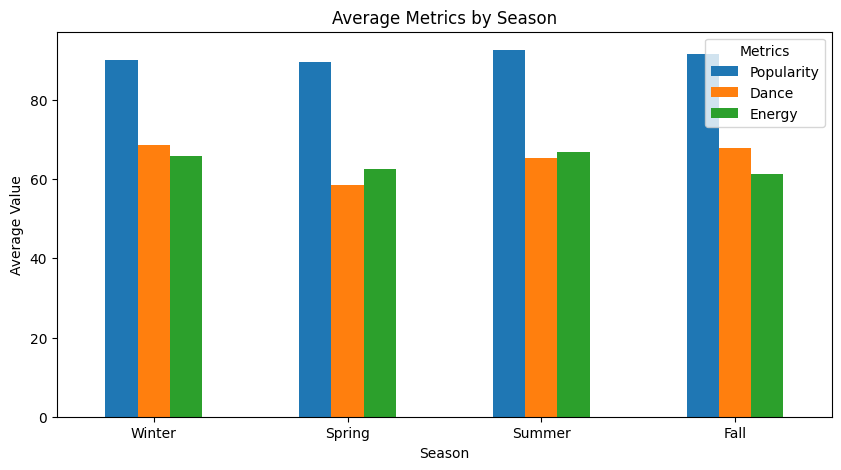

In [149]:
# Plotting average metrics by season
avg_by_season.plot(kind='bar', figsize=(10, 5))
plt.title('Average Metrics by Season')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.xticks(ticks=range(4), labels=['Winter', 'Spring', 'Summer', 'Fall'], rotation=0)
plt.legend(title='Metrics')
plt.show()


Once again, the average of the months were very insightful with some unexpected findings. The popularity of these songs throughout the months were pretty consistent. It was surprising to see that there were no songs released in Jan and April.

# Visual Interpretation of Music

I will lbe using a nifty little python  library called librosa that helps analyse musical files.

(Note to self: Top50Charts features names are mixed up. Song preview is actually the image and the other way around, and instead of fixing the issue I actually just use the correct name!)

In [102]:
import librosa
import numpy as np
from urllib.request import urlopen
import IPython.display as ipd
import librosa.display

We're playing the audio file, testing our sample file. For this section, to display Librosa's capabilities, I will be using the sample from Jack Harlow's Loving on Me for the next few sections.

In [103]:
testfile = "/content/drive/MyDrive/Statistical Analysis of Music/test.mp3.mp3"
ipd.Audio(testfile)

In [104]:
lovingOnMe, sr = librosa.load(testfile) #sr = sample rate, mono = true/false, we usually work with mono audio

In [105]:
print("Sample size = ", lovingOnMe.size)
print("Sample rate = ", sr)
print("Sample rate * lenght of the track aka 30 seconds = ",sr * 30)

Sample size =  655164
Sample rate =  22050
Sample rate * lenght of the track aka 30 seconds =  661500


 The sample rate for the clip is 22,050 Hz. The size of the audio signal is 655,164. Our 30 second clip can be broken down to 22050 Hz and 655164 units. Imagine we're taking 22050 snapshots of the sound wave every second for 30 seconds to create a digital representation of the audio. The size refers to the number of individual measurements or samples in the audio, and each of these individual pieces represents an amplitude of sound at that specific moment in time.

In [106]:
print("Audio time series = ", lovingOnMe)

Audio time series =  [-0.00689548 -0.00841101  0.00394523 ... -0.00301867  0.00517793
 -0.00027041]


In [107]:
sample_duration = 1/sr
print(f"Duration of 1 sample is {sample_duration:.5f} seconds")

print("total duration of the song = ", len(lovingOnMe) * sample_duration)

Duration of 1 sample is 0.00005 seconds
total duration of the song =  29.71265306122449


##Visualizing the waveforms

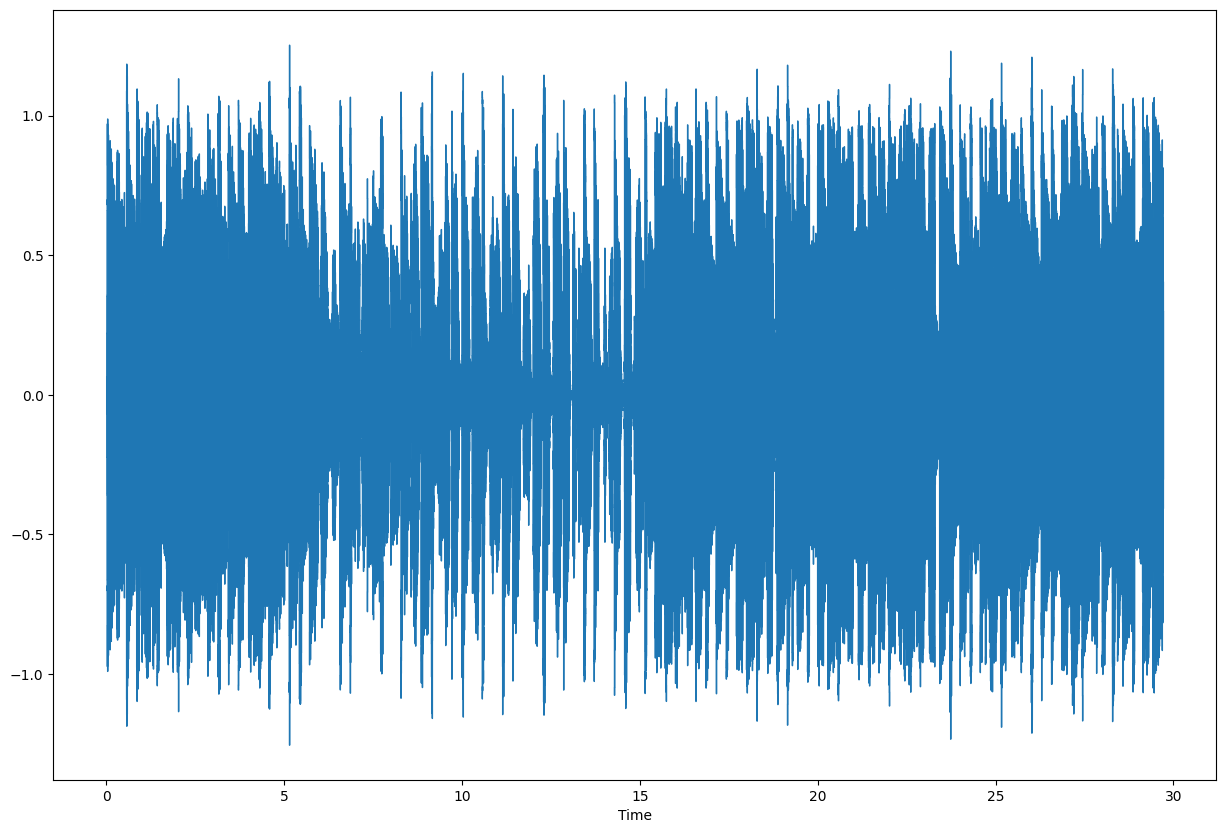

In [108]:
plt.figure(figsize =(15,10))
plt.subplot(1,1,1)
librosa.display.waveshow(lovingOnMe)

Percussive and Harmonic Components in the song can be separated and analysed. The percussions in the sample song seems to be persistent throughout the song. The harmonics remain pretty similar throughout the song except between the 6-15 second mark where in the song, the instrumentation is pulled back and the segment features an emphasis on spoken lyrics in teh audio above. It seems that the loudness/impact of the percussions are also noticable pulled back so that the listeners can listen better.

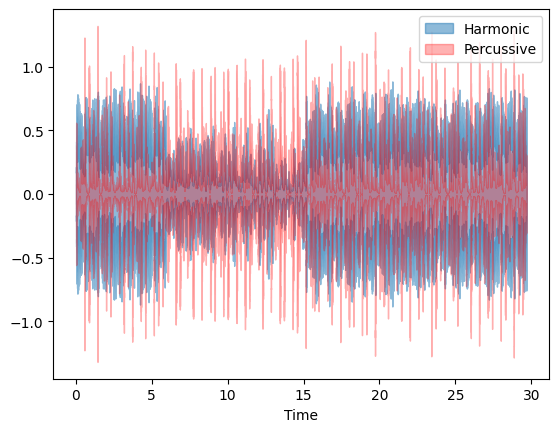

In [109]:
y_harm, y_perc = librosa.effects.hpss(lovingOnMe)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.3, label='Percussive')
plt.legend()

Looking at these separately,

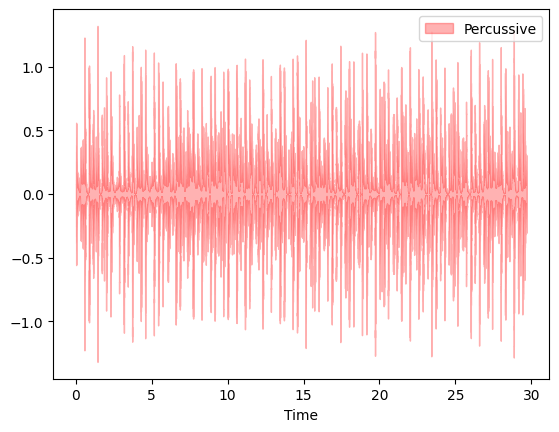

In [110]:
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.3, label='Percussive')
plt.legend()

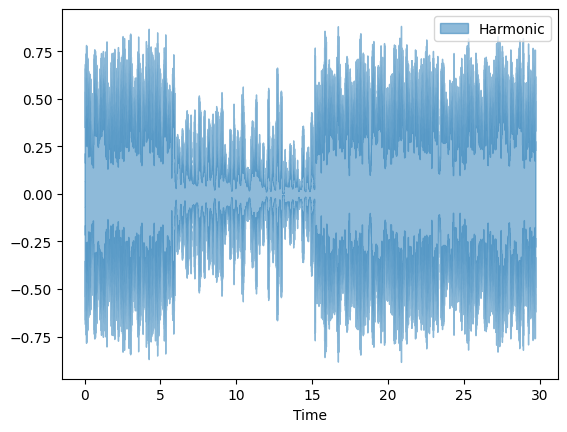

In [111]:
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
plt.legend()

##Spectrogram

According to the internet:

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

The Fourier transform is a mathematical formula that takes in a signal from the time domain, just like the wave for of the songfrom above and then decomposes a signal into its individual frequencies. This results in a frequency domain, or simply, the spectrum. The spectrogram in the following sections show the signal from above after applying a short term fourier transformation.

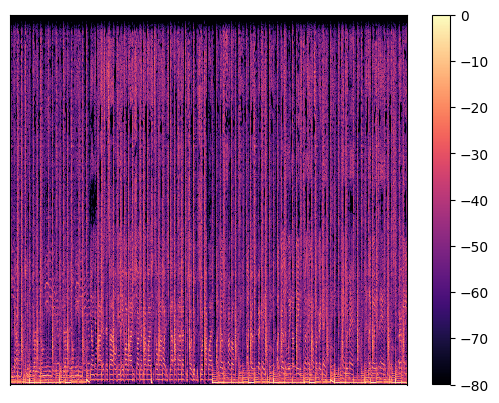

In [151]:
y = lovingOnMe
D = librosa.stft(lovingOnMe)  # STFT of y
#D
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

The human perception of sound is logarithmic in nature. We simply cannot perceive certain frequencies. Therefore, the y-axis is converted to a log scale, and the color dimension is converted to decibels, or log amplitude. The following spectrogram shows those decibels that are within the range of human perception.

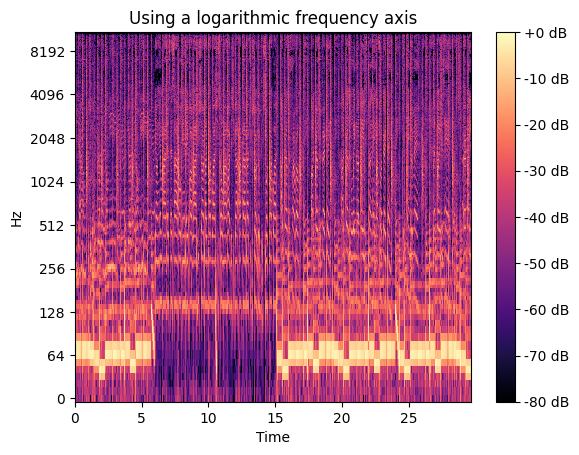

In [114]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")

A chromagram represents the intensity of the twelve different pitch classes (chromatic scale) in the audio signal over time. In music theory, the chromatic scale includes all twelve notes in an octave, each a half step apart.

Each row corresponds to one of the twelve pitch classes, typically starting from C and moving up through C#, D, D#, and so on, up to B.
Each column represents a time slice of the audio signal, showing which pitches are present at that moment and how strong they are.


The intensity of the color or the height of the bars in each cell of the grid indicates how much energy is present in a particular pitch class at a given time. This can be visualized in various ways, such as through color intensity in a heatmap or the height of bars in a graph.


Chromagrams are useful in music information retrieval for tasks like chord detection, music analysis, and genre classification, as they provide a simplified yet informative view of the harmonic content of the audio signal. They abstract away aspects like timbre and dynamics, focusing on the harmonic and melodic structure of the music.








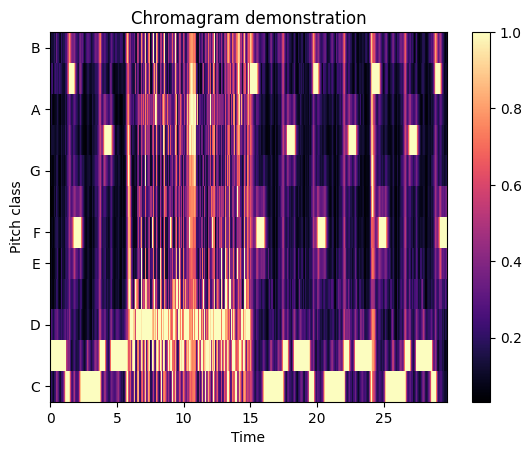

In [116]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

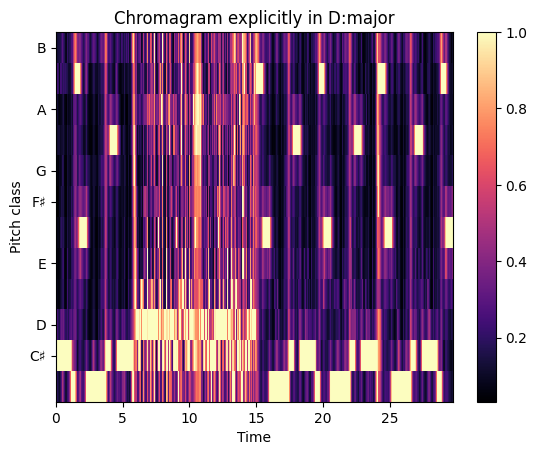

In [117]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time',
                               key='D:major', ax=ax)
ax.set(title='Chromagram explicitly in D:major')
fig.colorbar(img, ax=ax)

# Keys and Such
##Determining the colors

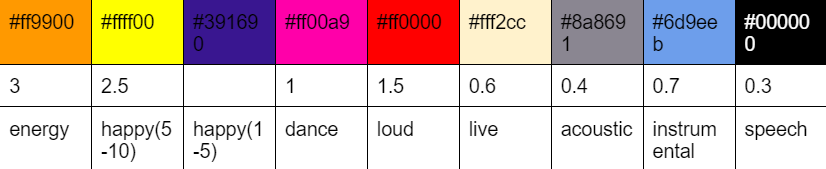



There have been many attempts to visualize emotions motivated by music through colors. Because this is heavily inspired by my own mild- synesthesia
, I have found a resource online that makes sense to me. This part of the project is very subjective. Trying to "see" music is something I have tried to make sense and it was one of the many factors that motivated me to complete this project. In this part of the project, I wanted to find a way to translate waves to colors and represent them visually. For this, I came up with the following gameplan:

1. Assign each feature a color based on what each feature may "look" like
2. Give each feature's color a weight, based on how prominently that feature affects the overall vibe of the song

Between "Energy", "Loud" and "Acoustic", the overall feel of the song is more influenced by "Energy" than "Acoustic". Hence, the prominence of the "Energy" color will carry more weight.

These "weights" determine how intense the colors will appear. Those songs with a higher values for "Energy" and "Loud", will appear more bright mixes of warm red and yellow and those that may score lower on these features might appear more pastel. The ultimate color of these songs will be determined after applying these assigned weights to the data provided by Spotify on these features and normalizing it on a scale of 1 to 10. The score on this scale will determine how bright or light each assigned feature's color will appear and influence the final picture. Thus, after getting the score for each color, we will mix the RGB values for each color. This way, an end color is determined for each song based on the features, their intensities and the mixing of those colors.

3. Step 2 gives us the color of the vibe of the song it best represents based on the data provided to us. I wanted to incorporate the color of the Key of the song as well, as there have been a lot of research on the influence of the key and the overall feel and mood of the song. This will also be used in the visual representation of the songs we analyze. This step will present us the color of the key of the song we are analyzing.

4. Now, based on the information we have calculated from above, we can proceed with creating a visual element that incorporates the color of the mood of the song from step 2 and the color of the key from step 3.

Because it made sense thematically, I picked the representation to be a circular spectrogram of the songs we analyze. Here, the waves/spectrogram of the song will be the color we calculated from Step 2. The background of the spectrogram will be the color of the key that we have calculated from step 3. To acheive this, I coded a program in P5.js that will build a spectrogram of the song we play in real time, with the option to pause and save the picture at the end. I called this "Seeing Music"

This can be accessed here:

"https://editor.p5js.org/adahal-thunder/full/ecB9NAzM-

Thus, tldr; This notebook will provide the two colors needed for the spectrogram. After manually inputting those colors in the link above will present the visual component of this project.

#Testing with AAABEST

After a conversation with Prof Forsberg, I asked him what his favourite album was. He recommended an album by AAA called AAABEST (great album rec btw prof). In honor of Prof Forsberg being the best Data Science advisor ever, I picked this album to test out my visuals.

In [119]:
AB = pd.read_csv('/content/drive/MyDrive/Statistical Analysis of Music/#AAABEST.csv')
AB.Key

0         A Major
1         F Major
2         B Major
3         B Minor
4         C Major
5     A#/B♭ Minor
6         F Major
7         C Minor
8     G#/A♭ Major
9         A Major
10    G#/A♭ Major
11        A Minor
12    G#/A♭ Major
13        C Major
14        G Major
Name: Key, dtype: object

In [120]:
ABFeatures = AB[['Song', 'Energy','Happy', 'Dance', 'Loud',  'Live', 'Acoustic','Instrumental', 'Speech','Key' ]]
ABFeatures

Song  Energy  Happy  Dance  Loud  Live  \
0                   BEYOND～カラダノカナタ      86     46     41    -4     0   
1                         MUSIC!!!      95     72     67    -2    30   
2                           旅ダチノウタ      66     58     63    -5    10   
3                       Break Down      95     50     68    -3    10   
4                        Hide-away     100     39     59    -3    10   
5                   Heart and Soul      99     41     57    -4     0   
6                           逢いたい理由      93     34     57    -3     0   
7                            負けない心      95     38     54    -3     0   
8                         PARADISE      96     37     56    -3    30   
9                           ダイジナコト      95     32     58    -3    30   
10                  No cry No more      89     64     65    -3    30   
11                            CALL      93     89     55    -3    20   
12              ハレルヤ - New Version      94     80     73    -3    30   
13  ハリケーン・リリ、ボストン・マリ - New Version      92     46     46    -2     0   
14          Get チュー! - New Version      96     51     55    -2    30   

    Acoustic  Instrumental  Speech          Key  
0          0             0       0      A Major  
1         32             0       0      F Major  
2         47             0       0      B Major  
3          0             0      10      B Minor  
4          0             3       0      C Major  
5          1             0      10  A#/B♭ Minor  
6          0             0       0      F Major  
7          2             0       0      C Minor  
8          0             0       0  G#/A♭ Major  
9          0             0       0      A Major  
10         0             0       0  G#/A♭ Major  
11         0             0       0      A Minor  
12         1             0       0  G#/A♭ Major  
13         0             0       0      C Major  
14         1             0       0      G Major

In [121]:
import numpy as np

# Create a new column 'Sad' with 0 as default values
ABFeatures['Sad'] = 0

# Use .loc to find rows where 'Happy' is less than 50, then move those values to 'Sad'
ABFeatures.loc[ABFeatures['Happy'] < 50, 'Sad'] = ABFeatures.loc[ABFeatures['Happy'] < 50, 'Happy']

# Set 'Happy' to 0 where 'Happy' was less than 50
ABFeatures.loc[ABFeatures['Happy'] < 50, 'Happy'] = 0

# Now, ABFeatures will have the 'Sad' column with values moved from 'Happy' where 'Happy' was less than 50

<ipython-input-121-4f16b3fb5acc>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
ABFeatures
AAABEST = ABFeatures.copy()
AAABEST = AAABEST[['Song', 'Energy','Happy', 'Sad', 'Dance', 'Loud',  'Live', 'Acoustic','Instrumental', 'Speech', 'Key']]

In [123]:
AAABEST

Song  Energy  Happy  Sad  Dance  Loud  Live  \
0                   BEYOND～カラダノカナタ      86      0   46     41    -4     0   
1                         MUSIC!!!      95     72    0     67    -2    30   
2                           旅ダチノウタ      66     58    0     63    -5    10   
3                       Break Down      95     50    0     68    -3    10   
4                        Hide-away     100      0   39     59    -3    10   
5                   Heart and Soul      99      0   41     57    -4     0   
6                           逢いたい理由      93      0   34     57    -3     0   
7                            負けない心      95      0   38     54    -3     0   
8                         PARADISE      96      0   37     56    -3    30   
9                           ダイジナコト      95      0   32     58    -3    30   
10                  No cry No more      89     64    0     65    -3    30   
11                            CALL      93     89    0     55    -3    20   
12              ハレルヤ - New Version      94     80    0     73    -3    30   
13  ハリケーン・リリ、ボストン・マリ - New Version      92      0   46     46    -2     0   
14          Get チュー! - New Version      96     51    0     55    -2    30   

    Acoustic  Instrumental  Speech          Key  
0          0             0       0      A Major  
1         32             0       0      F Major  
2         47             0       0      B Major  
3          0             0      10      B Minor  
4          0             3       0      C Major  
5          1             0      10  A#/B♭ Minor  
6          0             0       0      F Major  
7          2             0       0      C Minor  
8          0             0       0  G#/A♭ Major  
9          0             0       0      A Major  
10         0             0       0  G#/A♭ Major  
11         0             0       0      A Minor  
12         1             0       0  G#/A♭ Major  
13         0             0       0      C Major  
14         1             0       0      G Major

Normalizing and Scaling from 1 to 10 for each of the features. Here we define the "intensities" of the color.

In [124]:
import pandas as pd
import numpy as np

# Normalize 'Loud' from -60 to 0 dB to 0 to 100 scale
AAABEST['Loud'] = AAABEST['Loud'].apply(lambda x: ((x - (-60)) / (0 - (-60))) * 100)

# Define weights for each feature
weights = {
    'Energy': 3,
    'Happy': 2.5,
    'Sad': 2.5,
    'Dance': 1,
    'Loud': 1.5,  # Already normalized to 0-100 scale
    'Live': 0.6,
    'Acoustic': 0.4,
    'Instrumental': 0.7,
    'Speech': 0.3
}

# Multiply each feature by its weight and normalize to a 0-10 scale
for feature, weight in weights.items():
    max_value = AAABEST[feature].max() * weight  # Maximum possible weighted value for normalization
    AAABEST[feature] = AAABEST[feature].apply(lambda x: ((x * weight) / max_value) * 10)

# Combine all features into a single array column 'Intensities'
AAABEST['Intensities'] = AAABEST.apply(lambda row: [row[feature] for feature in weights.keys()], axis=1)

for i in AAABEST.Intensities:
  print(i)



[8.6, 0.0, 10.0, 5.616438356164384, 9.655172413793103, 0.0, 0.0, 0.0, 0.0]
[9.5, 8.089887640449438, 0.0, 9.178082191780822, 10.0, 10.0, 6.808510638297872, 0.0, 0.0]
[6.6000000000000005, 6.5168539325842705, 0.0, 8.63013698630137, 9.482758620689655, 3.333333333333333, 10.0, 0.0, 0.0]
[9.5, 5.617977528089888, 0.0, 9.315068493150685, 9.827586206896552, 3.333333333333333, 0.0, 0.0, 10.0]
[10.0, 0.0, 8.478260869565217, 8.082191780821917, 9.827586206896552, 3.333333333333333, 0.0, 10.0, 0.0]
[9.9, 0.0, 8.91304347826087, 7.808219178082192, 9.655172413793103, 0.0, 0.2127659574468085, 0.0, 10.0]
[9.3, 0.0, 7.391304347826086, 7.808219178082192, 9.827586206896552, 0.0, 0.0, 0.0, 0.0]
[9.5, 0.0, 8.26086956521739, 7.397260273972602, 9.827586206896552, 0.0, 0.425531914893617, 0.0, 0.0]
[9.6, 0.0, 8.043478260869566, 7.671232876712328, 9.827586206896552, 10.0, 0.0, 0.0, 0.0]
[9.5, 0.0, 6.956521739130435, 7.945205479452055, 9.827586206896552, 10.0, 0.0, 0.0, 0.0]
[8.9, 7.191011235955056, 0.0, 8.90410958

##Final Color


In [152]:
#testing the color mixing
from PIL import ImageColor

def mix_colors(intensities, colors):
    rgb_colors = [ImageColor.getcolor(color, "RGB") for color in colors]
    sum_weighted_colors = [0, 0, 0]
    total_intensity = sum(intensities)
    if total_intensity == 0:
        return '#000000'
    for intensity, rgb in zip(intensities, rgb_colors):
        weight = intensity / total_intensity
        sum_weighted_colors = [sum_weighted_colors[i] + weight * rgb[i] for i in range(3)]
    mixed_rgb = tuple(min(max(0, int(color)), 255) for color in sum_weighted_colors)
    return '#{:02x}{:02x}{:02x}'.format(*mixed_rgb)

def mix_colors_for_all_rows(df, intensities_col, colors):
    mood_colors = []
    for intensities in df[intensities_col]:
        mixed_color = mix_colors(intensities, colors)
        mood_colors.append(mixed_color)
    return mood_colors

# Define the colors for each feature
colors = ["#ff9900", "#ffff00", "#391690", "#ff00a9", "#ff0000", "#fff2cc", "#8a8691", "#6d9eeb", "#000000"]

# Apply color mixing for all rows
AAABEST['MoodColor'] = mix_colors_for_all_rows(AAABEST, 'Intensities', colors)

Now, we want to map the color of the keys to their base colors. This is taken from Mr. Mars's Musical Color Wheel.

https://warrenmars.com/visual_art/theory/colour_wheel/music_colours/music_colours.htm

In [127]:
key_color_mapping = {
    'C Major': 'Cyan',
    'G Major': 'Chrysolite',
    'D Major': 'Bright Green',
    'A Major': 'Chartreuse',
    'E Major': 'Yellow',
    'B Major': 'Turmeric',
    'F#/G♭ Major': 'Red',
    'C#/D♭ Major': 'Pink',
    'G#/A♭ Major': 'Magenta',
    'D#/E♭ Major': 'Violet',
    'A#/B♭ Major': 'Corn Flower',
    'F Major': 'Azure',
    'A Minor': 'Pthalo Green',
    'E Minor': 'Brunswick Green',
    'B Minor': 'Zucchini',
    'F# Minor': 'Oak Leaf',
    'C# Minor': 'Olive Drab',
    'G# Minor': 'Milk Chocolate',
    'E♭/D# Minor': 'Maroon',
    'A#/B♭ Minor': 'Elderberry',
    'F Minor': 'Purple',
    'C Minor': 'Spectral Violet',
    'G Minor': 'Ultramarine',
    'D Minor': 'Prussian Blue'
}


In [128]:
import pandas as pd

AAABEST['KeyColor'] = AAABEST['Key'].map(key_color_mapping)
AAABEST[['Song','KeyColor', 'Key']]

Song         KeyColor          Key
0                   BEYOND～カラダノカナタ       Chartreuse      A Major
1                         MUSIC!!!            Azure      F Major
2                           旅ダチノウタ         Turmeric      B Major
3                       Break Down         Zucchini      B Minor
4                        Hide-away             Cyan      C Major
5                   Heart and Soul       Elderberry  A#/B♭ Minor
6                           逢いたい理由            Azure      F Major
7                            負けない心  Spectral Violet      C Minor
8                         PARADISE          Magenta  G#/A♭ Major
9                           ダイジナコト       Chartreuse      A Major
10                  No cry No more          Magenta  G#/A♭ Major
11                            CALL     Pthalo Green      A Minor
12              ハレルヤ - New Version          Magenta  G#/A♭ Major
13  ハリケーン・リリ、ボストン・マリ - New Version             Cyan      C Major
14          Get チュー! - New Version       Chrysolite      G Major

Now changing hex colors to RGB values

In [154]:
# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')  # Remove '#' if it exists
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# Apply the function to each row in the 'hex_color' column
AAABEST['MoodColorinRGB'] = AAABEST['MoodColor'].apply(hex_to_rgb)

In [155]:
AAABEST[['Song','MoodColor','MoodColorinRGB', 'Key', 'KeyColor']]

Song MoodColor  MoodColorinRGB          Key  \
0                   BEYOND～カラダノカナタ   #c42d46   (196, 45, 70)      A Major   
1                         MUSIC!!!   #f07f55  (240, 127, 85)      F Major   
2                           旅ダチノウタ   #e46c50  (228, 108, 80)      B Major   
3                       Break Down   #c94d2f   (201, 77, 47)      B Minor   
4                        Hide-away   #bf5270  (191, 82, 112)      C Major   
5                   Heart and Soul   #a12538   (161, 37, 56)  A#/B♭ Minor   
6                           逢いたい理由   #d42e45   (212, 46, 69)      F Major   
7                            負けない心   #cf2f46   (207, 47, 70)      C Minor   
8                         PARADISE   #db5a63   (219, 90, 99)  G#/A♭ Major   
9                           ダイジナコト   #df5b63   (223, 91, 99)      A Major   
10                  No cry No more   #ff7d4f  (255, 125, 79)  G#/A♭ Major   
11                            CALL   #ff803c  (255, 128, 60)      A Minor   
12              ハレルヤ - New Version   #fe7f4d  (254, 127, 77)  G#/A♭ Major   
13  ハリケーン・リリ、ボストン・マリ - New Version   #c72d46   (199, 45, 70)      C Major   
14          Get チュー! - New Version   #fe7c4d  (254, 124, 77)      G Major   

           KeyColor  
0        Chartreuse  
1             Azure  
2          Turmeric  
3          Zucchini  
4              Cyan  
5        Elderberry  
6             Azure  
7   Spectral Violet  
8           Magenta  
9        Chartreuse  
10          Magenta  
11     Pthalo Green  
12          Magenta  
13             Cyan  
14       Chrysolite

Voilà! Here's all the information we need to create our eye!
To make things easier, Here's the RGB value for each of the key colors:

Chartreuse (187, 255, 0)


Azure (0,170, 255)

Turmeric (255, 191, 0)

Zucchini (0,79, 0)

Cyan (0, 255, 255)

Elderberry (112, 0, 74)

Spectral Violet (76, 0, 115)

Magenta (255, 0, 255)

Pthalo Green (0, 74, 74)

Chrysolite (0, 255, 170)


#Testing it on p5.js

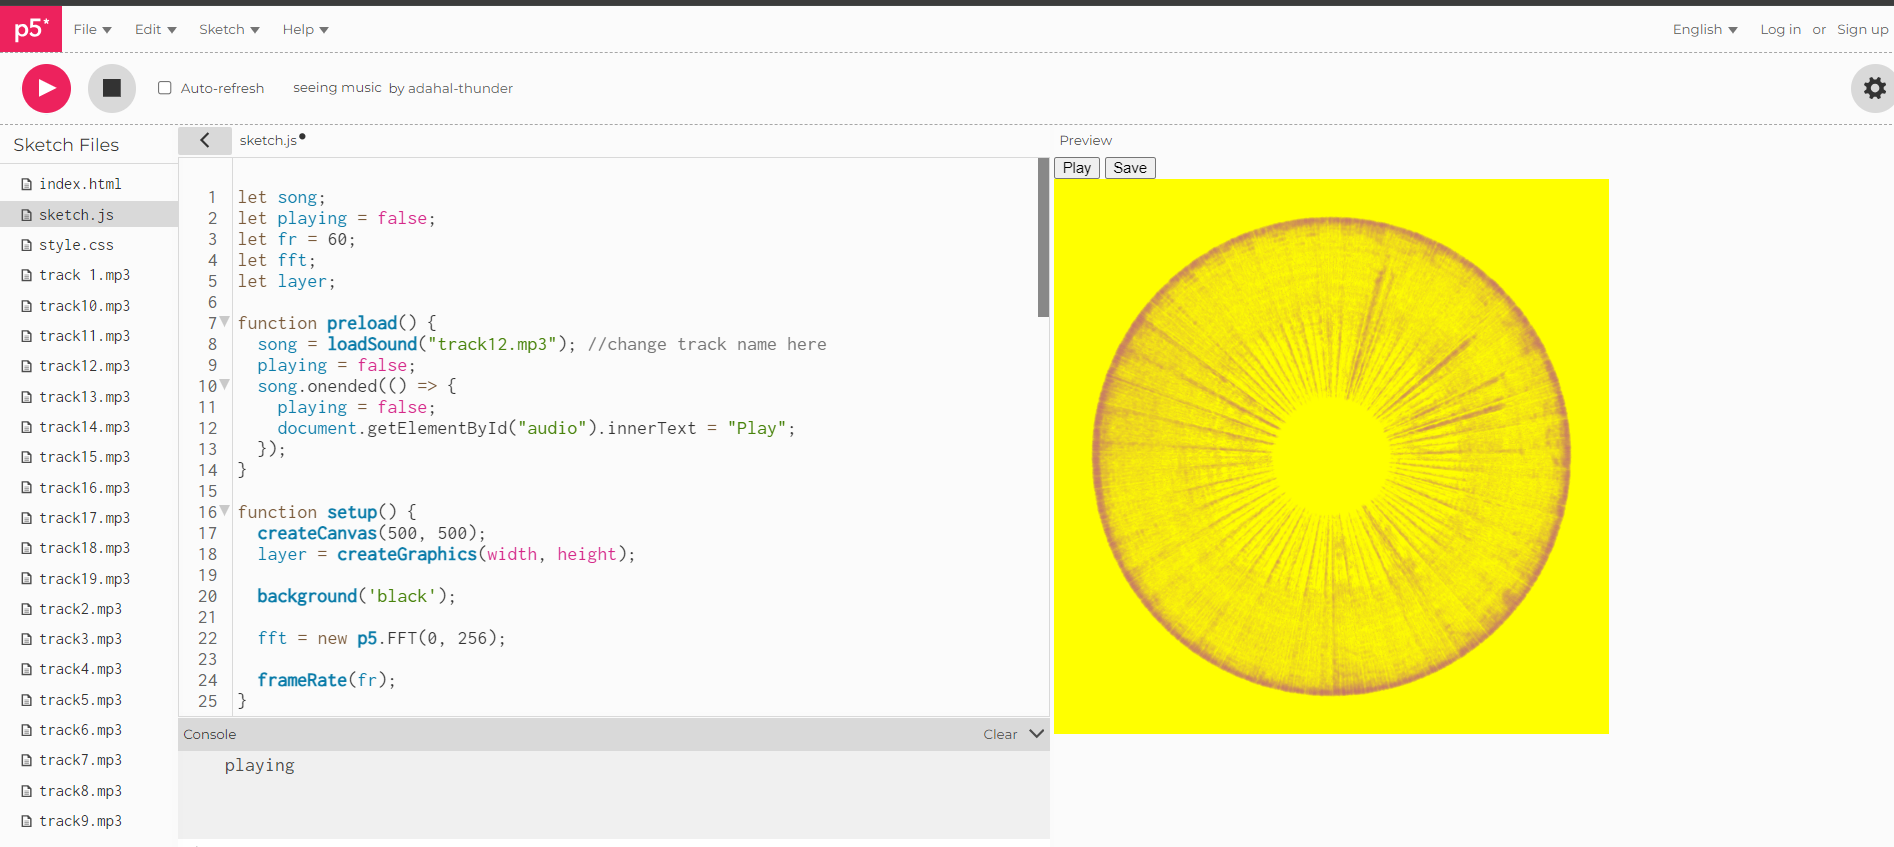

Here's a small snippet of what the program looks like after putting in the track of your choice and changing the RGB values in the correct lines. I have commented where exactly to change these values. After running it, you will be able to see the formation of the "eye" as the track plays. You also have the option to save this or pause it. Something to note, this is fine tuned to display 30 second samples. For longer tracks, a few adjustments are to be made to capture the details of the spectrum.

This is what the spectrogram for AAABEST looks like. I find it fascinating how cohesive the colors feel and how bright or fun it feels. It's definitely a more upbeat vibe.

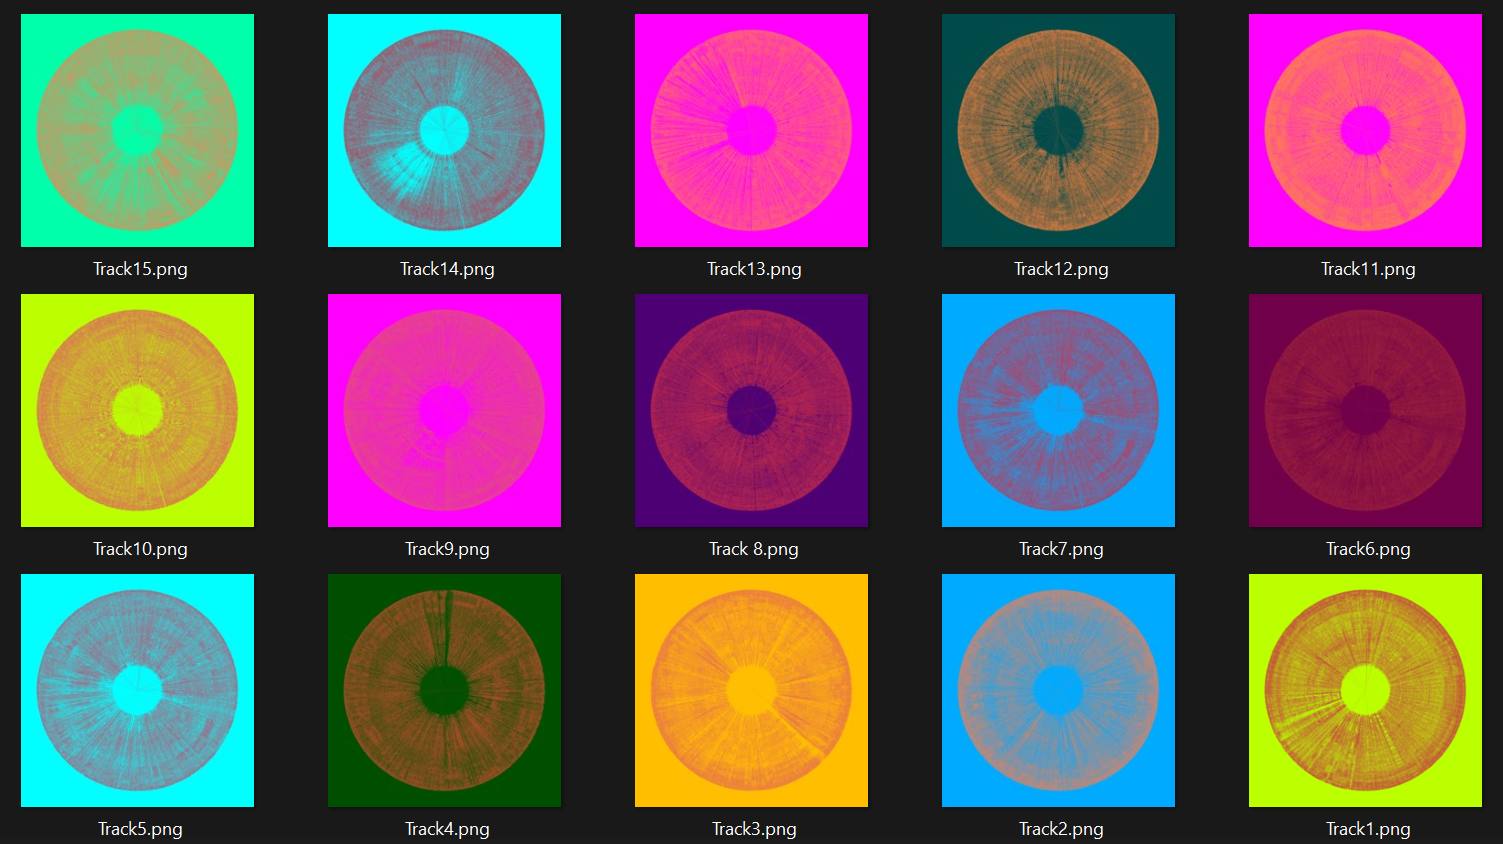

#Trying it with another album, Glow part2. by The Microphones

In [131]:
glow = pd.read_csv('/content/drive/MyDrive/Statistical Analysis of Music/The Glow, Pt. 2.csv')


In [132]:
glowFeatures = glow[['Song', 'Energy','Happy', 'Dance', 'Loud',  'Live', 'Acoustic','Instrumental', 'Speech','Key' ]]
glowFeatures

Song  Energy  Happy  Dance  Loud  Live  Acoustic  \
0            I Want Wind to Blow      41     24     40   -15    10        75   
1                The Glow, Pt. 2      58     10     28   -11    50        41   
2                       The Moon      72     16     20   -10    10        40   
3              Headless Horseman      17      7     60   -19    10        96   
4   My Roots Are Strong and Deep      31     35     28   -14    10        82   
5                   Instrumental      35      4     43   -19    10        75   
6                    The Mansion      33     20     19   -22    10        76   
7                    (Something)       3     10     14   -34    10        75   
8                (Something) - 1      26      7     18   -19    10        24   
9           I'll Not Contain You      33     39     34   -19    10        95   
10              The Gleam, Pt. 2      46     29     51   -12    10        64   
11                           Map      81      7     20    -7    10         5   
12          You'll Be in the Air      26      7     44   -14    10        83   
13             I Want to Be Cold      82     28     18   -10    20         0   
14                    I Am Bored      51     38     45   -14    10        69   
15                I Felt My Size      41     23     33   -14    10        44   
16              Instrumental - 2      27     11     37   -17    10        85   
17             I Felt Your Shape      33     55     65   -12    10        87   
18                 Samurai Sword      48      5     12   -12    10         9   
19                 My Warm Blood       2      7     21   -23    10        78   

    Instrumental  Speech          Key  
0             79       0      F Major  
1             12       0      C Major  
2             79       0      G Major  
3              9       0      C Major  
4             95       0      G Major  
5             93       0      E Minor  
6             83       0  A#/B♭ Minor  
7             93       0  A#/B♭ Minor  
8             91       0      B Major  
9             26       0      G Major  
10            81       0  A#/B♭ Minor  
11            74       0      B Minor  
12             1       0      A Major  
13            90      10  G#/A♭ Minor  
14            36       0      A Minor  
15             4       0      C Major  
16            78       0      E Major  
17             3       0      D Major  
18            88       0      B Major  
19            89       0      B Major

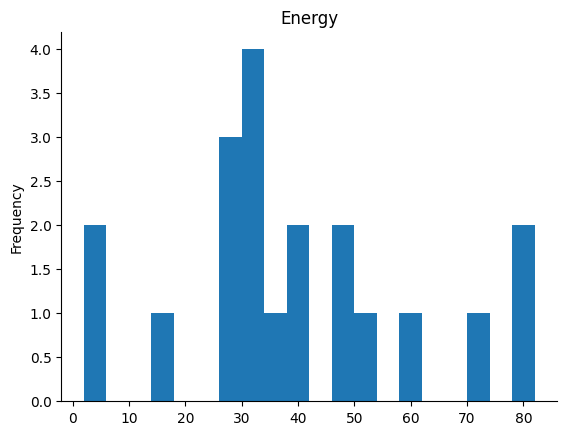

In [133]:
# @title Energy

from matplotlib import pyplot as plt
glowFeatures['Energy'].plot(kind='hist', bins=20, title='Energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [134]:
import numpy as np

# Create a new column 'Sad' with 0 as default values
glowFeatures['Sad'] = 0

# Use .loc to find rows where 'Happy' is less than 50, then move those values to 'Sad'
glowFeatures.loc[glowFeatures['Happy'] < 50, 'Sad'] = glowFeatures.loc[glowFeatures['Happy'] < 50, 'Happy']

# Set 'Happy' to 0 where 'Happy' was less than 50
glowFeatures.loc[glowFeatures['Happy'] < 50, 'Happy'] = 0

# Now, glowFeatures will have the 'Sad' column with values moved from 'Happy' where 'Happy' was less than 50

<ipython-input-134-4c0a6c8f0375>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
key_color_mapping = {
    'C Major': 'Cyan',
    'G Major': 'Chrysolite',
    'D Major': 'Bright Green',
    'A Major': 'Chartreuse',
    'E Major': 'Yellow',
    'B Major': 'Turmeric',
    'F#/G♭ Major': 'Red',
    'C#/D♭ Major': 'Pink',
    'G#/A♭ Major': 'Magenta',
    'D#/E♭ Major': 'Violet',
    'A#/B♭ Major': 'Corn Flower',
    'F Major': 'Azure',
    'A Minor': 'Pthalo Green',
    'E Minor': 'Brunswick Green',
    'B Minor': 'Zucchini',
    'F# Minor': 'Oak Leaf',
    'C# Minor': 'Olive Drab',
    'G#/A♭ Minor': 'Milk Chocolate',
    'E♭/D# Minor': 'Maroon',
    'A#/B♭ Minor': 'Elderberry',
    'F Minor': 'Purple',
    'C Minor': 'Spectral Violet',
    'G Minor': 'Ultramarine',
    'D Minor': 'Prussian Blue'
}


In [136]:
glow.Key

0         F Major
1         C Major
2         G Major
3         C Major
4         G Major
5         E Minor
6     A#/B♭ Minor
7     A#/B♭ Minor
8         B Major
9         G Major
10    A#/B♭ Minor
11        B Minor
12        A Major
13    G#/A♭ Minor
14        A Minor
15        C Major
16        E Major
17        D Major
18        B Major
19        B Major
Name: Key, dtype: object

In [137]:
import pandas as pd

glowFeatures['KeyColor'] = glowFeatures['Key'].map(key_color_mapping)
glowFeatures[['Song','KeyColor', 'Key']]

<ipython-input-137-f6486dfc7ba2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Song         KeyColor          Key
0            I Want Wind to Blow            Azure      F Major
1                The Glow, Pt. 2             Cyan      C Major
2                       The Moon       Chrysolite      G Major
3              Headless Horseman             Cyan      C Major
4   My Roots Are Strong and Deep       Chrysolite      G Major
5                   Instrumental  Brunswick Green      E Minor
6                    The Mansion       Elderberry  A#/B♭ Minor
7                    (Something)       Elderberry  A#/B♭ Minor
8                (Something) - 1         Turmeric      B Major
9           I'll Not Contain You       Chrysolite      G Major
10              The Gleam, Pt. 2       Elderberry  A#/B♭ Minor
11                           Map         Zucchini      B Minor
12          You'll Be in the Air       Chartreuse      A Major
13             I Want to Be Cold   Milk Chocolate  G#/A♭ Minor
14                    I Am Bored     Pthalo Green      A Minor
15                I Felt My Size             Cyan      C Major
16              Instrumental - 2           Yellow      E Major
17             I Felt Your Shape     Bright Green      D Major
18                 Samurai Sword         Turmeric      B Major
19                 My Warm Blood         Turmeric      B Major

This is what the album looks like. It's visibly more dull and subdued than the previous album. The indie album feels more relaxed and bittersweet than the previous album, just based on the vibe it gives off.

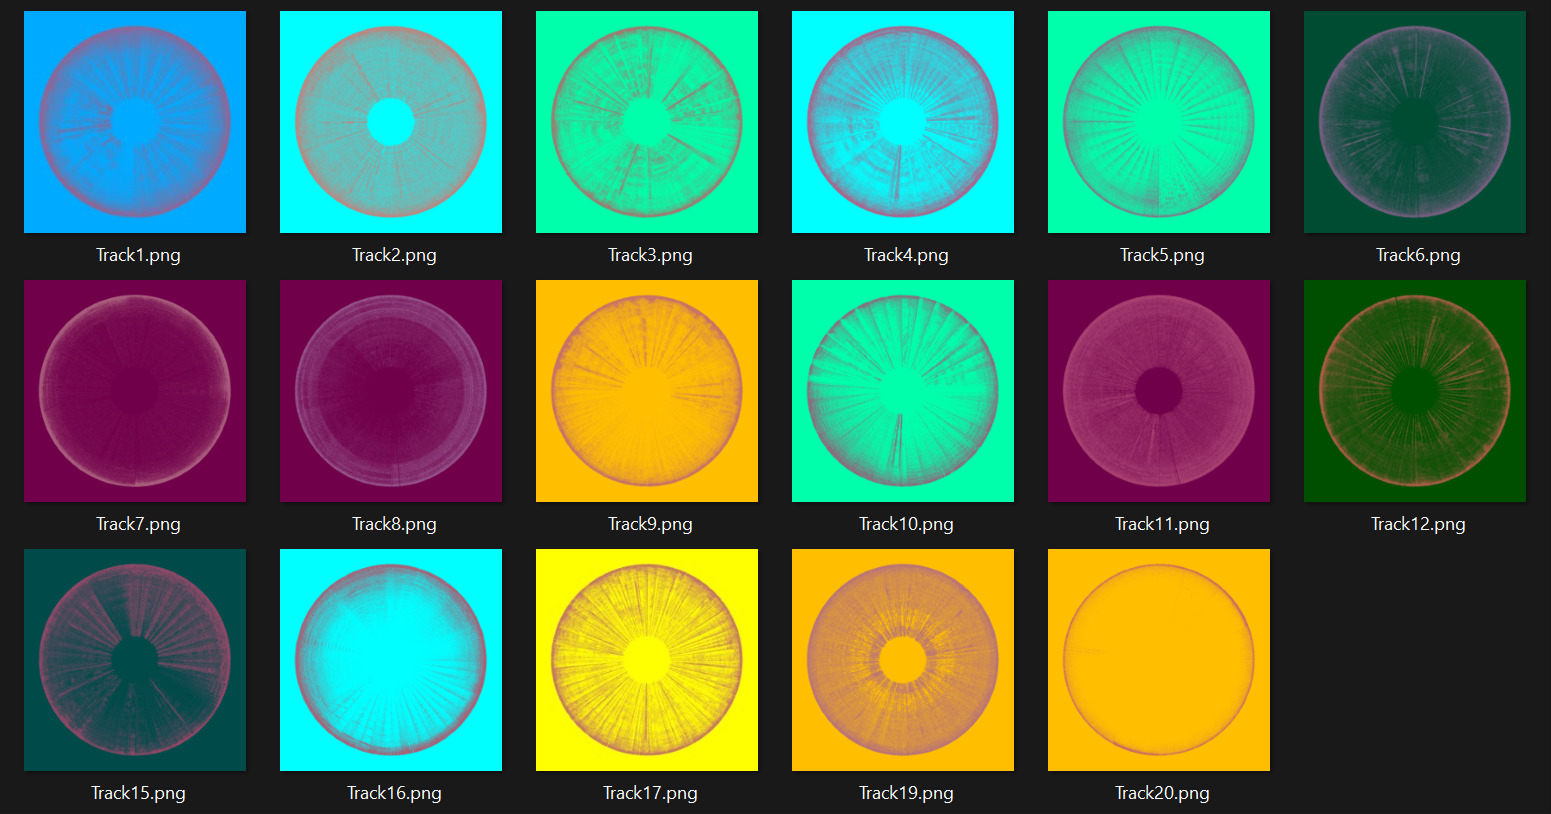

American Beauty
Studio album by Grateful Dead

